# NBaIoT SOM+Algos CLASSIFY

## Device 9

- Training on device 9 (using both Mirai and Gafgyt).
- Testing on device 9 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/huunoi/Projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

2023-02-17 23:17:38.684022: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/huunoi/Projects/research/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 9

In [8]:
train_index

9

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((19528, 115), (19528,)),
 ((316438, 115), (316438,)),
 ((514860, 115), (514860,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((13669, 115), (5859, 115), (13669,), (5859,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((221506, 115), (94932, 115), (221506,), (94932,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((360402, 115), (154458, 115), (360402,), (154458,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

13669


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(13669, 115) (13669,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(27338, 115) (27338,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(13669, 115) (13669,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(27338, 115) (27338,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(100791, 115) (100791,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((5859, 115), (94932, 115), (5859,), (94932,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(160317, 115) (160317,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(112221, 115) (112221,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, 
#                                                                  algo='rand')

### Test on the same device

#### Test on gafgyt

In [31]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [32]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [33]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [34]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [35]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='tpe')

### Test on first device

#### Test on gafgyt

In [36]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [37]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [38]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [39]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [40]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(27338, 115) (27338,)
------------Scale data-----------------
(27338, 115) (27338,)
X_train_scaled
[[ 3.32869865e-03  7.79381460e-02  4.54488186e-08 ...  1.41522176e-18
   1.36728386e-34  2.63126798e-17]
 [ 3.32869866e-03  7.79381461e-02  4.57449383e-08 ...  3.60958584e-18
  -3.45930289e-34 -2.72313269e-17]
 [ 6.65707238e-03  4.28659691e-01  1.56212870e-16 ...  1.28096278e-16
  -2.66732426e-33  0.00000000e+00]
 ...
 [ 3.32869851e-03  7.79381306e-02  1.10840735e-08 ...  4.00575989e-18
  -1.30751189e-34  0.00000000e+00]
 [ 3.32869846e-03  4.28659691e-01  0.00000000e+00 ...  1.01244481e-16
   2.68973875e-34  9.38332470e-19]
 [ 3.32869846e-03  7.79381256e-02  9.72585611e-18 ...  2.00067898e-18
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(27338, 115) (27338,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.975     0.998     0.987      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.988     0.998     0.993    100791
weighted avg      0.998     0.998     0.998    100791



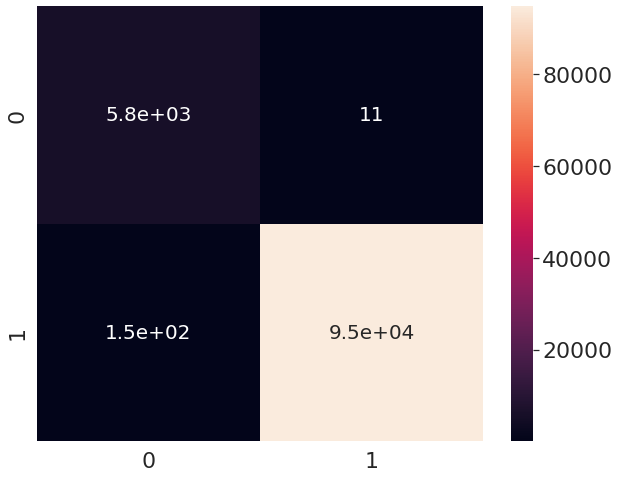

AUC score:  9.982817679246906e-01


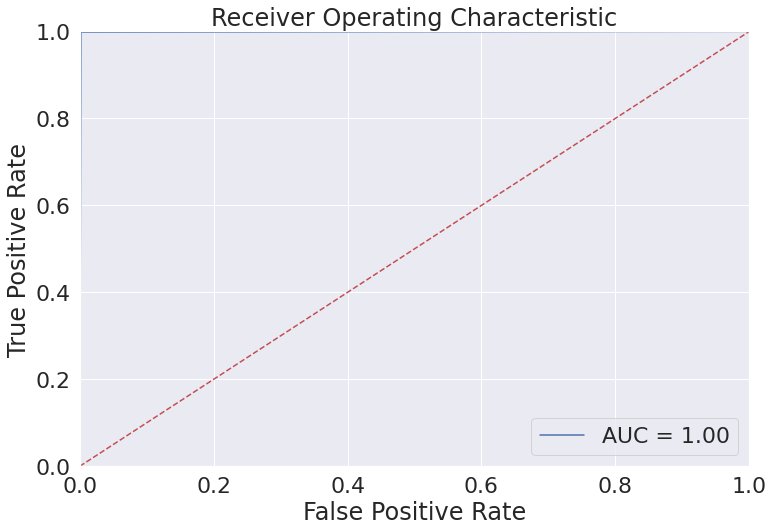

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [41]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.978     0.998     0.988      5859
           2      1.000     0.999     0.999     94932

    accuracy                          0.999    100791
   macro avg      0.989     0.998     0.994    100791
weighted avg      0.999     0.999     0.999    100791



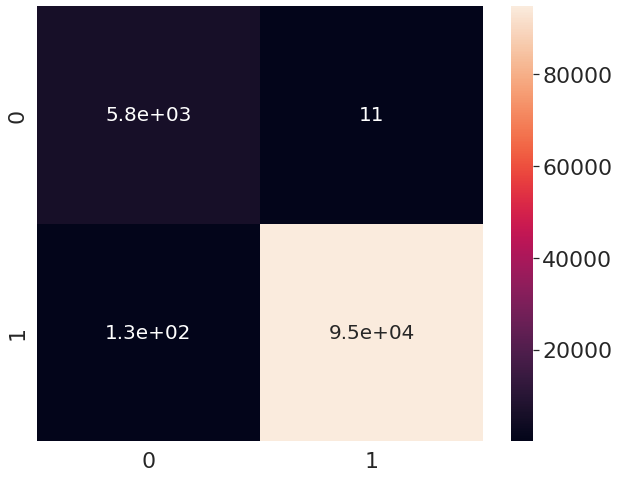

AUC score:  0.998360771843285


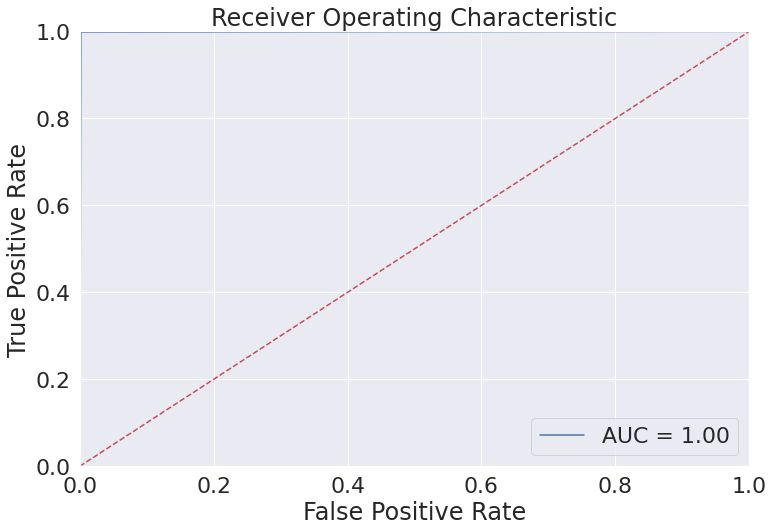

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='KNN')

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.975     0.998     0.987      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.988     0.998     0.993    100791
weighted avg      0.998     0.998     0.998    100791



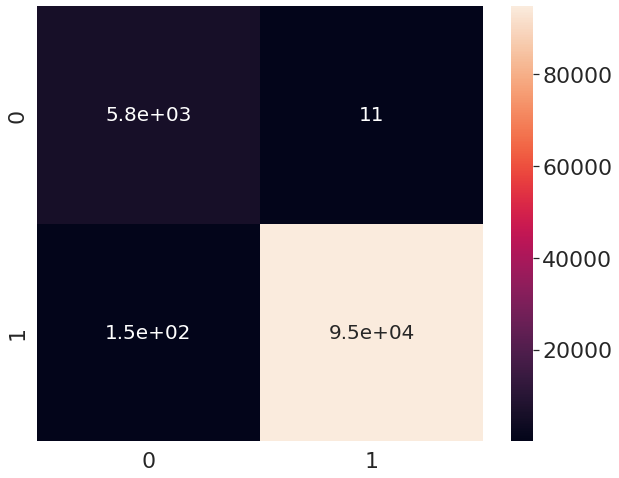

AUC score:  0.9982817679246906


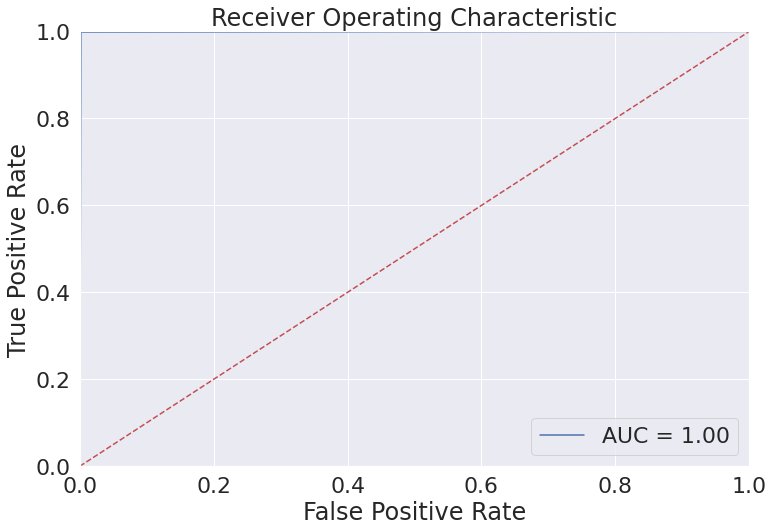

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SVM')

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.975     0.998     0.987      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.988     0.998     0.993    100791
weighted avg      0.998     0.998     0.998    100791



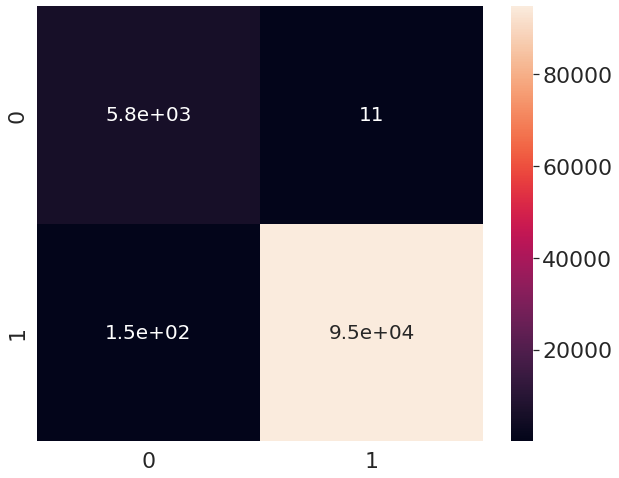

AUC score:  0.9982817679246906


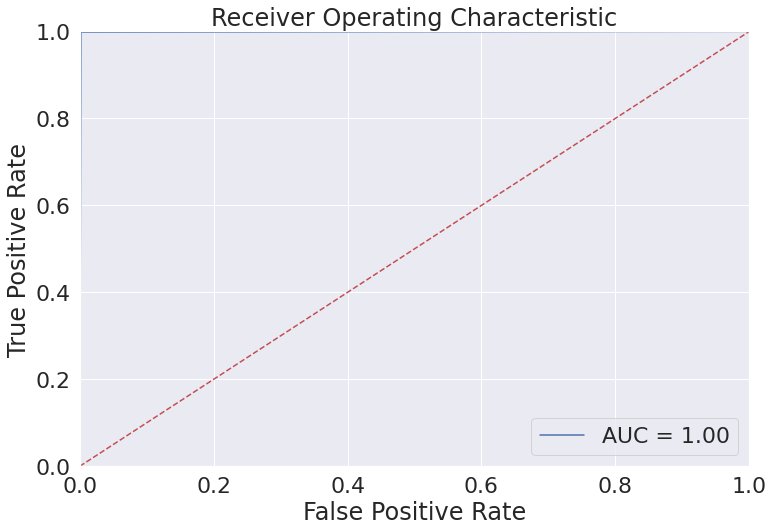

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SOFTMAX')

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.975     0.998     0.987      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.988     0.998     0.993    100791
weighted avg      0.998     0.998     0.998    100791



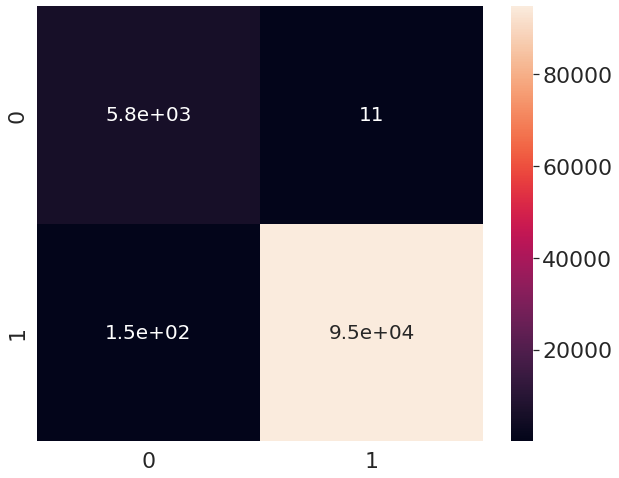

AUC score:  0.9982817679246906


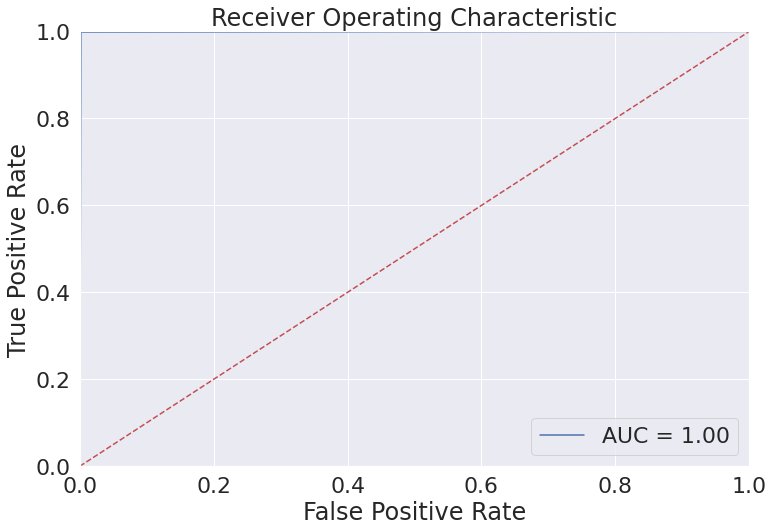

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='RF')

#### Test on Mirai

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.052     0.998     0.099      4100
           2      1.000     0.311     0.475    108121

    accuracy                          0.336    112221
   macro avg      0.526     0.655     0.287    112221
weighted avg      0.965     0.336     0.461    112221



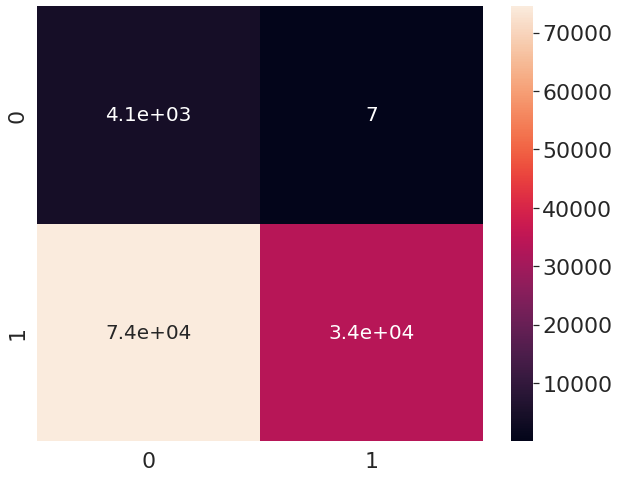

AUC score:  0.6546989168188035


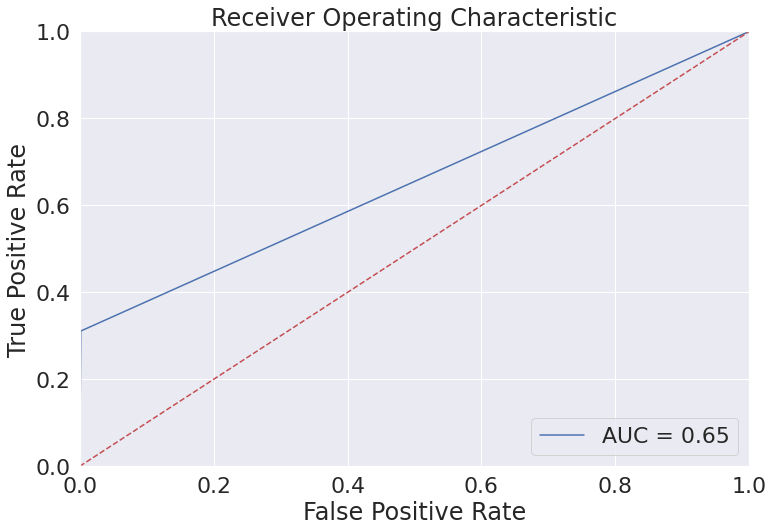

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.052     0.998     0.099      4100
           2      1.000     0.311     0.475    108121

    accuracy                          0.336    112221
   macro avg      0.526     0.655     0.287    112221
weighted avg      0.965     0.336     0.461    112221



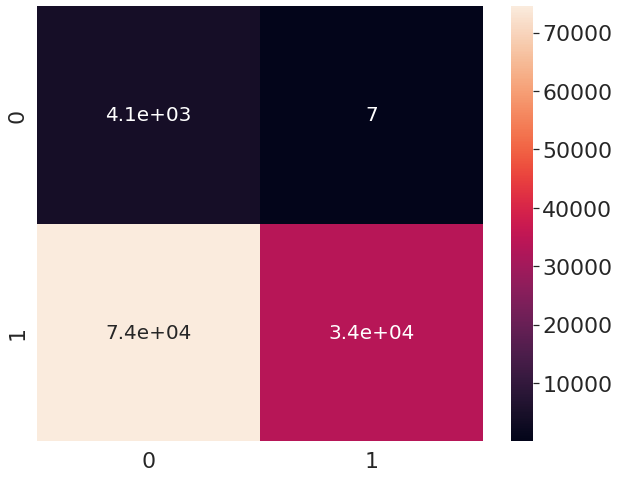

AUC score:  0.6547266635100105


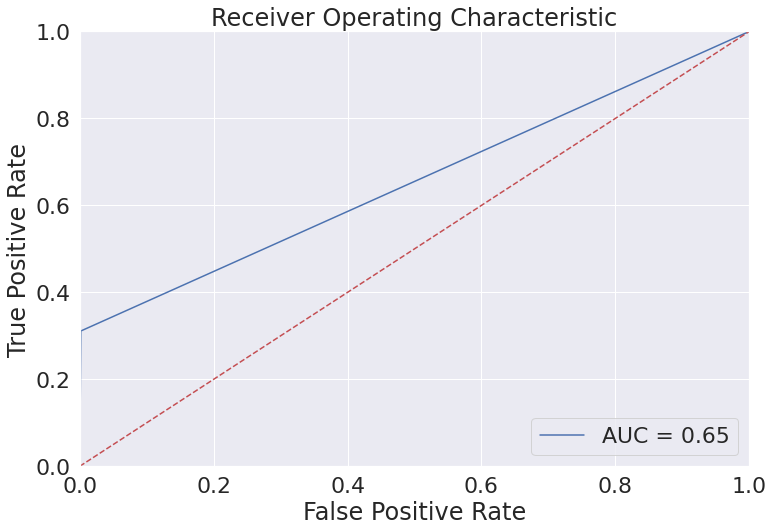

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='KNN')

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.052     0.998     0.099      4100
           2      1.000     0.311     0.475    108121

    accuracy                          0.336    112221
   macro avg      0.526     0.655     0.287    112221
weighted avg      0.965     0.336     0.461    112221



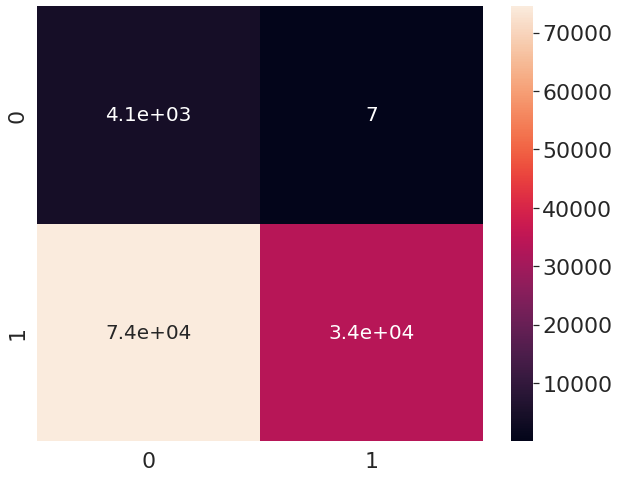

AUC score:  0.6546989168188035


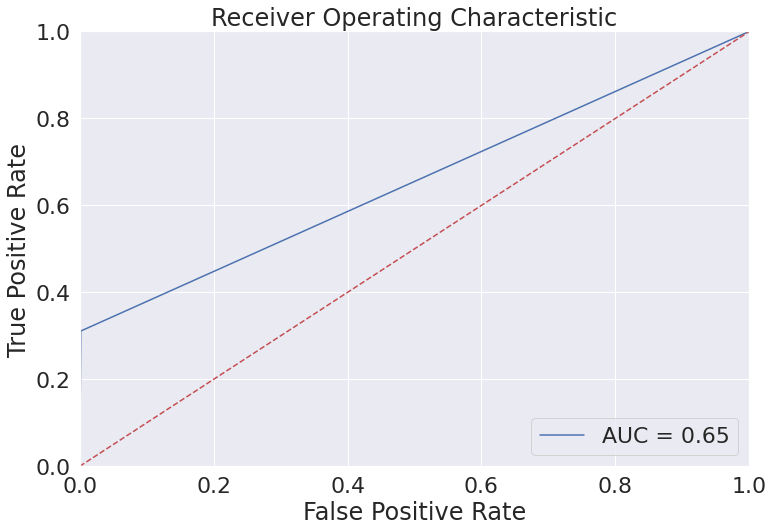

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SVM')

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.052     0.998     0.099      4100
           2      1.000     0.311     0.475    108121

    accuracy                          0.336    112221
   macro avg      0.526     0.655     0.287    112221
weighted avg      0.965     0.336     0.461    112221



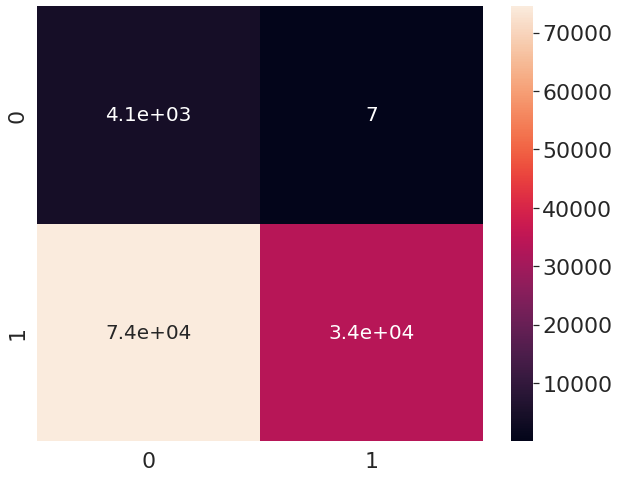

AUC score:  0.6546989168188035


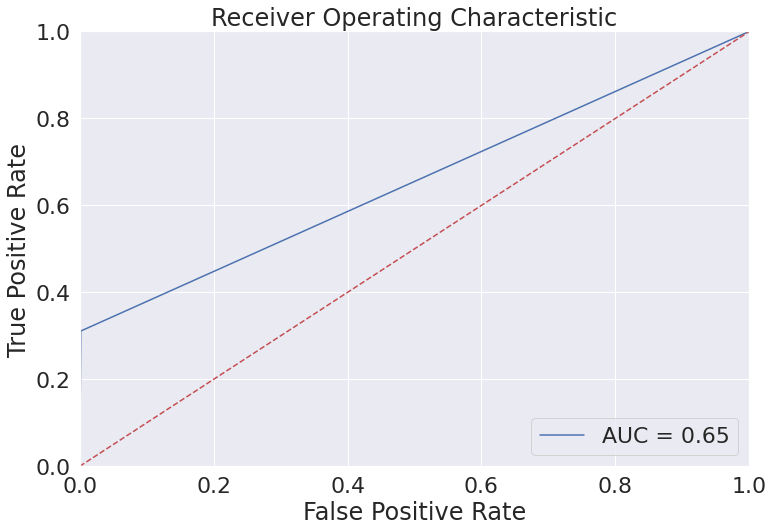

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SOFTMAX')

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.052     0.998     0.099      4100
           2      1.000     0.311     0.475    108121

    accuracy                          0.336    112221
   macro avg      0.526     0.655     0.287    112221
weighted avg      0.965     0.336     0.461    112221



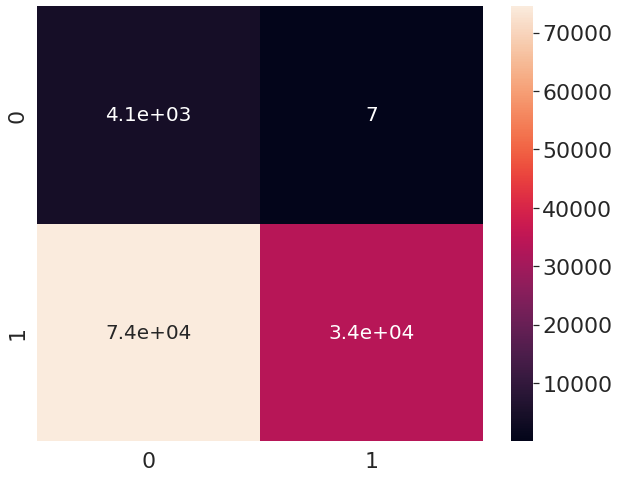

AUC score:  0.6546989168188035


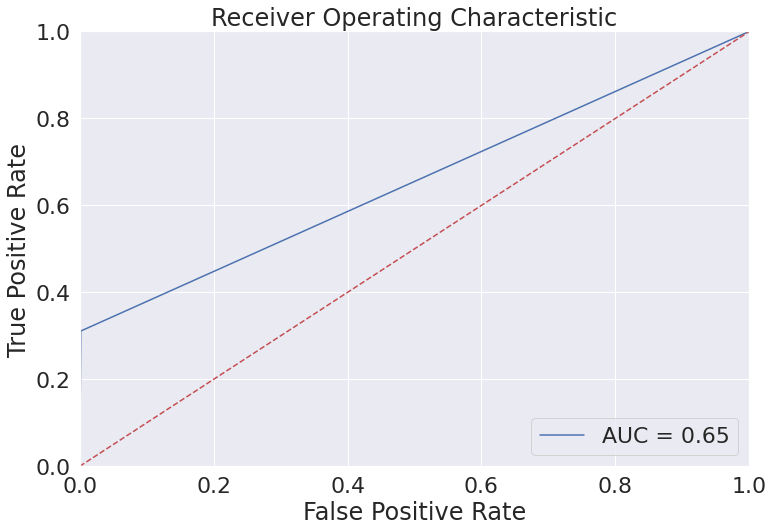

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [50]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='RF')


## 2.1.4. Anneal

### Train

In [51]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [52]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [53]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [54]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [55]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [56]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='rand')

### Test on the same device

#### Test on gafgyt

In [57]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [58]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [59]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [60]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [61]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='tpe')

### Test on the same device

#### Test on gafgyt

In [62]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [63]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [64]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [65]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [66]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(27338, 115) (27338,)
------------Scale data-----------------
(27338, 115) (27338,)
X_train_scaled
[[ 2.57355758e-03  8.95522623e-02  5.09993530e-08 ...  1.41522176e-18
   1.46484248e-34  3.08609282e-17]
 [ 2.57355759e-03  8.95522624e-02  5.13316369e-08 ...  3.60958584e-18
  -3.70613152e-34 -3.19383671e-17]
 [ 5.14686395e-03  4.92537313e-01  1.75290702e-16 ...  1.28096278e-16
  -2.85764352e-33  0.00000000e+00]
 ...
 [ 2.57355747e-03  8.95522445e-02  1.24377398e-08 ...  4.00575989e-18
  -1.40080565e-34  0.00000000e+00]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  1.01244481e-16
   2.88165734e-34  1.10052687e-18]
 [ 2.57355743e-03  8.95522388e-02  1.09136471e-17 ...  2.00067898e-18
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(27338, 115) (27338,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.416     0.988     0.586      5859
           2      0.999     0.915     0.955     94932

    accuracy                          0.919    100791
   macro avg      0.708     0.951     0.770    100791
weighted avg      0.965     0.919     0.934    100791



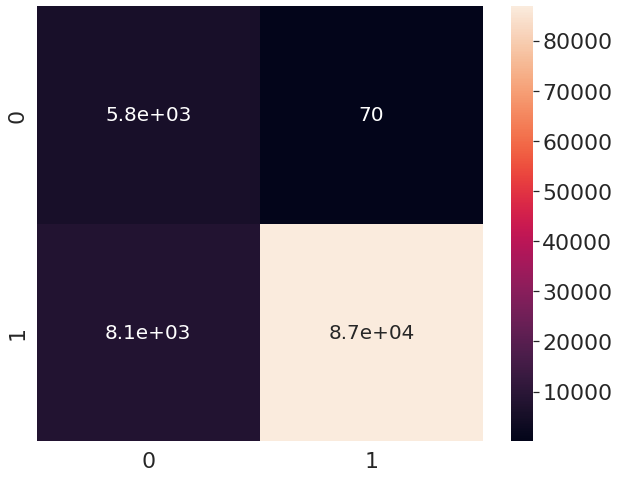

AUC score:  9.512904313172212e-01


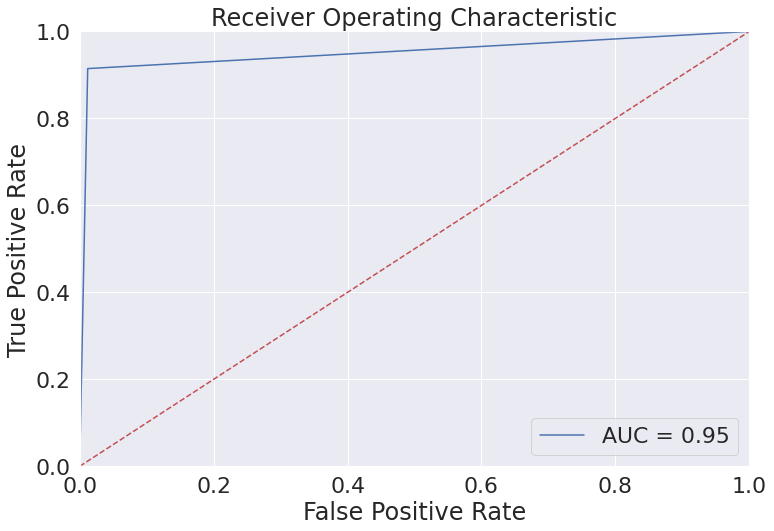

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.420     0.988     0.590      5859
           2      0.999     0.916     0.956     94932

    accuracy                          0.920    100791
   macro avg      0.710     0.952     0.773    100791
weighted avg      0.966     0.920     0.934    100791



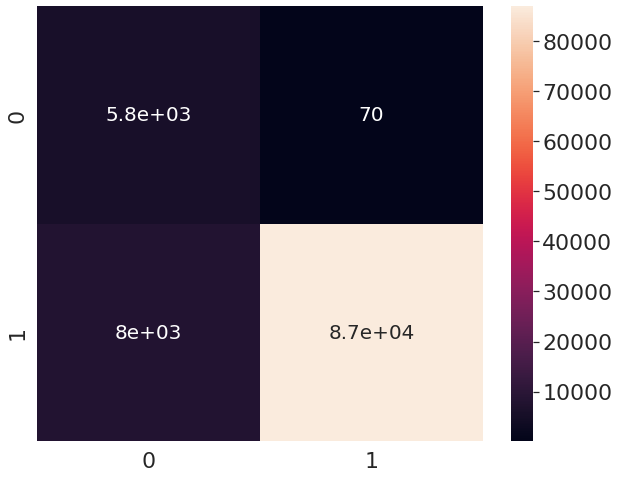

AUC score:  0.9519382634496951


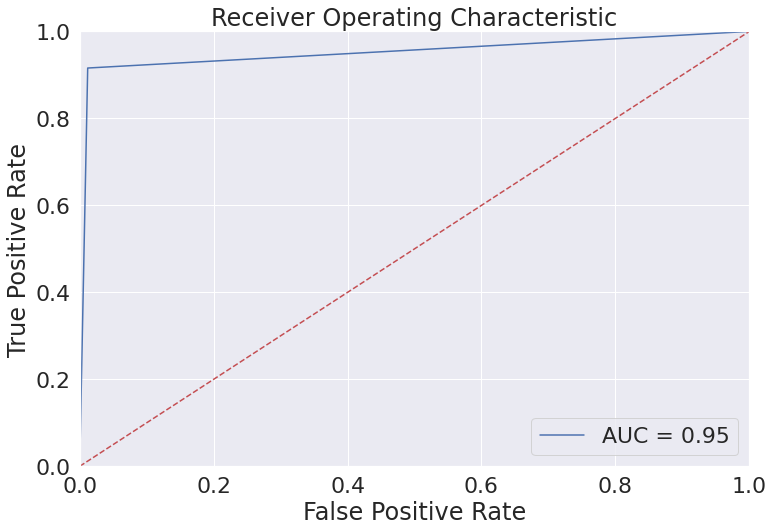

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'KNN')

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.416     0.988     0.586      5859
           2      0.999     0.915     0.955     94932

    accuracy                          0.919    100791
   macro avg      0.708     0.951     0.770    100791
weighted avg      0.965     0.919     0.934    100791



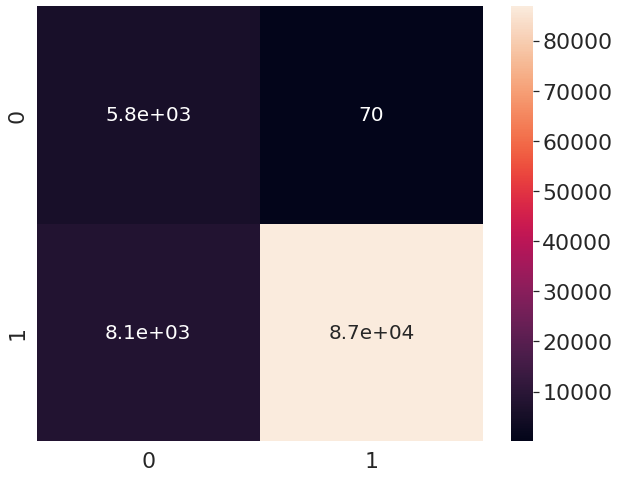

AUC score:  0.9512904313172212


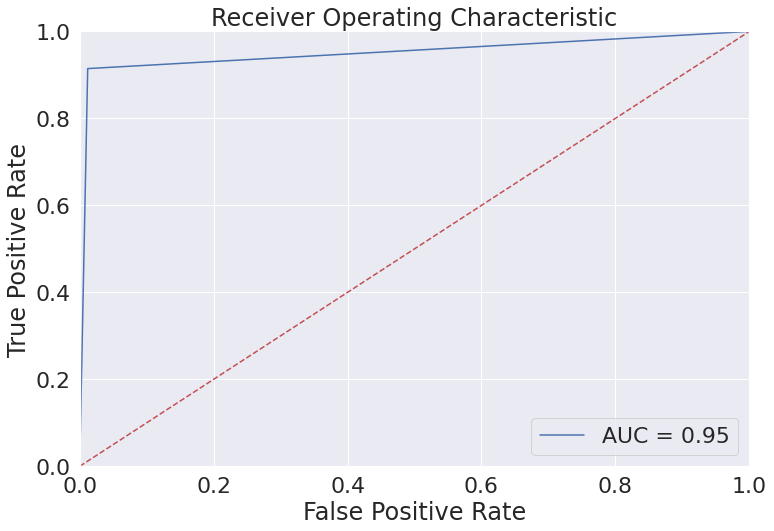

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SVM')

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.416     0.988     0.586      5859
           2      0.999     0.915     0.955     94932

    accuracy                          0.919    100791
   macro avg      0.708     0.951     0.770    100791
weighted avg      0.965     0.919     0.934    100791



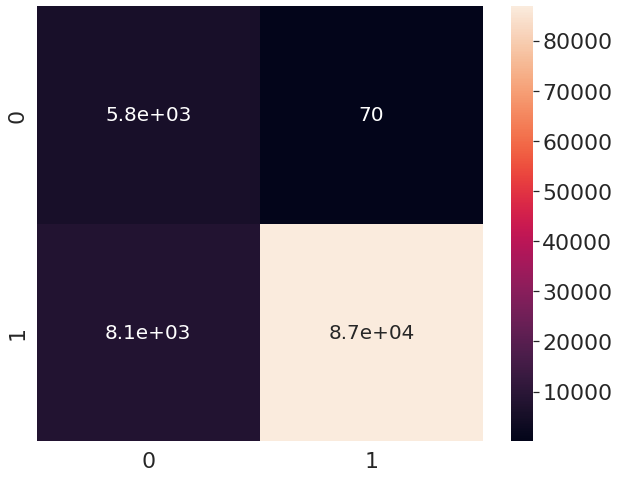

AUC score:  0.9512904313172212


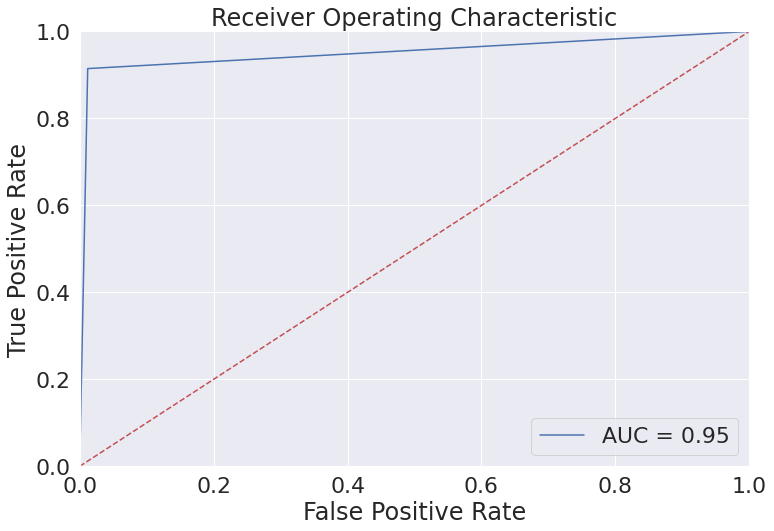

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SOFTMAX')

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.416     0.988     0.586      5859
           2      0.999     0.915     0.955     94932

    accuracy                          0.919    100791
   macro avg      0.708     0.951     0.770    100791
weighted avg      0.965     0.919     0.934    100791



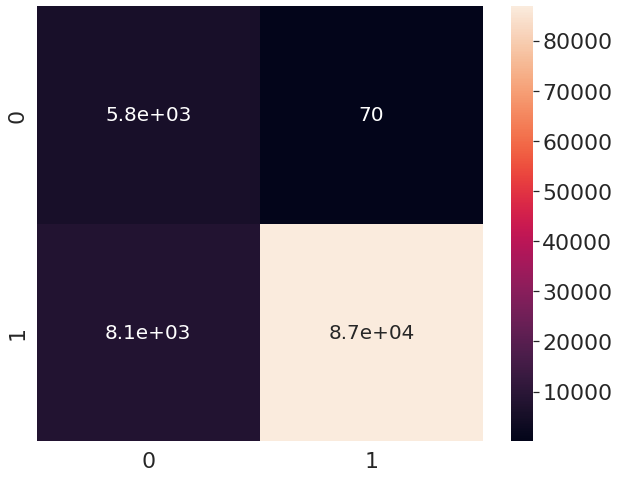

AUC score:  0.9512904313172212


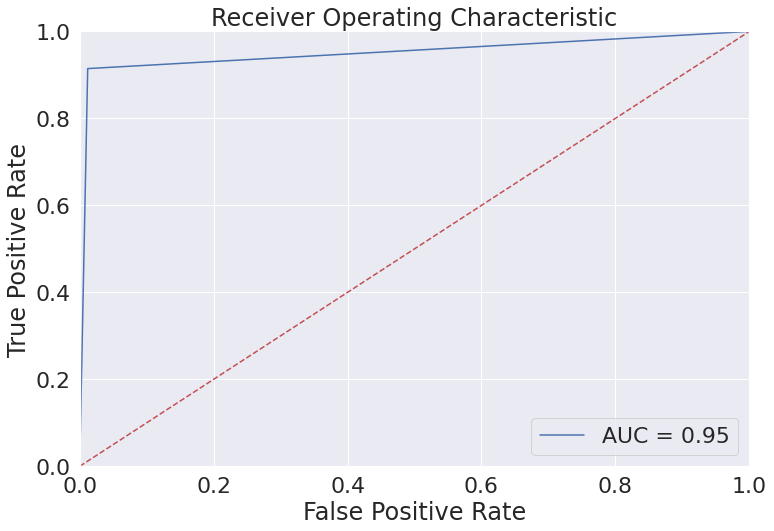

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [71]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'RF')

#### Test on Mirai

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.966     0.988     0.976      4100
           2      1.000     0.999     0.999    108121

    accuracy                          0.998    112221
   macro avg      0.983     0.993     0.988    112221
weighted avg      0.998     0.998     0.998    112221



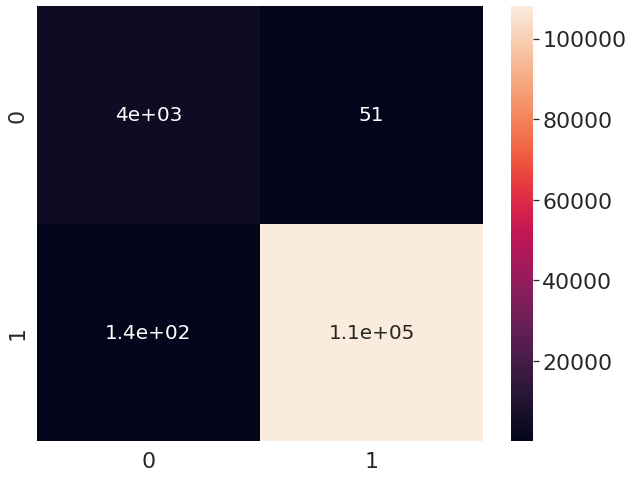

AUC score:  0.9931145672159083


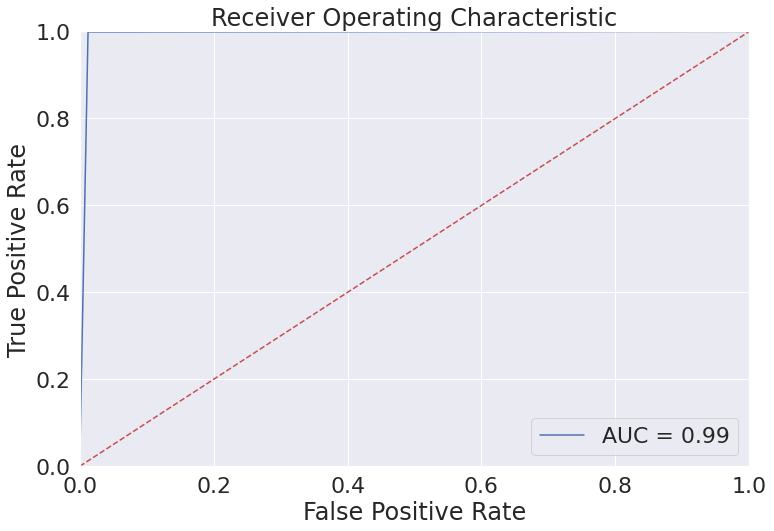

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.967     0.988     0.977      4100
           2      1.000     0.999     0.999    108121

    accuracy                          0.998    112221
   macro avg      0.983     0.993     0.988    112221
weighted avg      0.998     0.998     0.998    112221



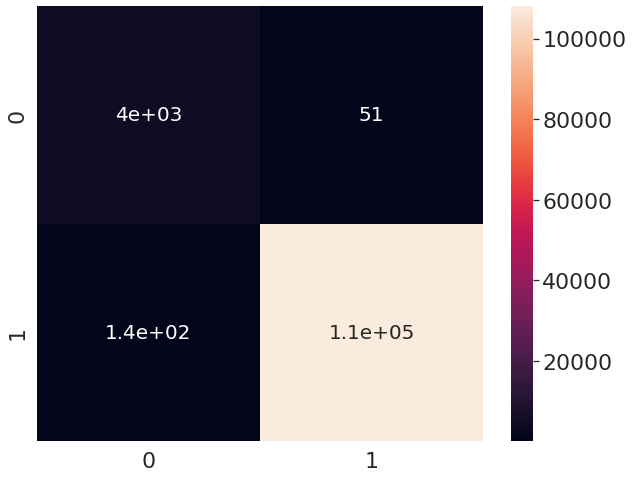

AUC score:  0.9931469383556498


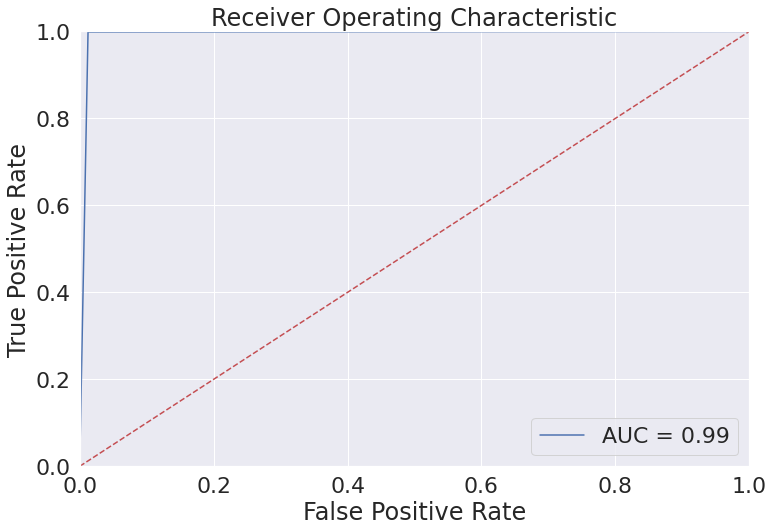

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'KNN')

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.966     0.988     0.976      4100
           2      1.000     0.999     0.999    108121

    accuracy                          0.998    112221
   macro avg      0.983     0.993     0.988    112221
weighted avg      0.998     0.998     0.998    112221



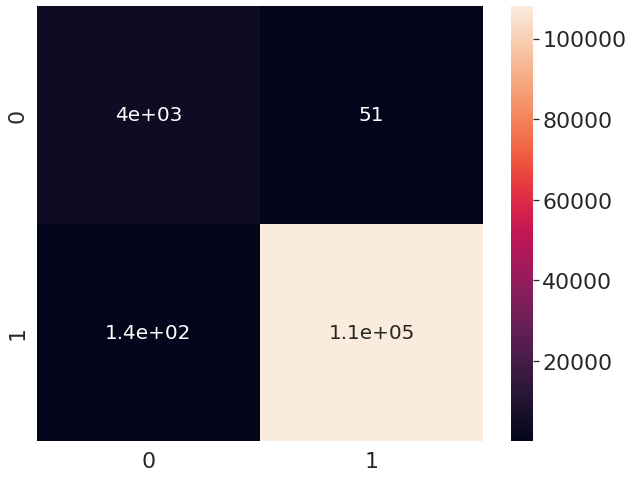

AUC score:  0.9931145672159083


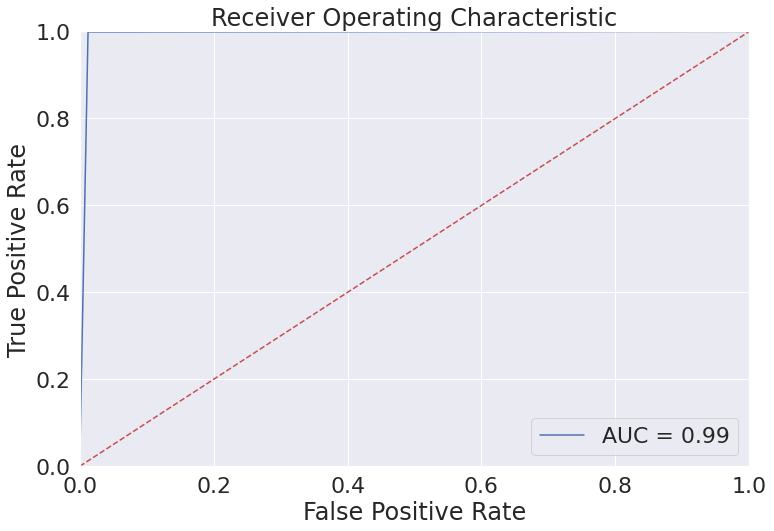

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [74]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SVM')

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.966     0.988     0.976      4100
           2      1.000     0.999     0.999    108121

    accuracy                          0.998    112221
   macro avg      0.983     0.993     0.988    112221
weighted avg      0.998     0.998     0.998    112221



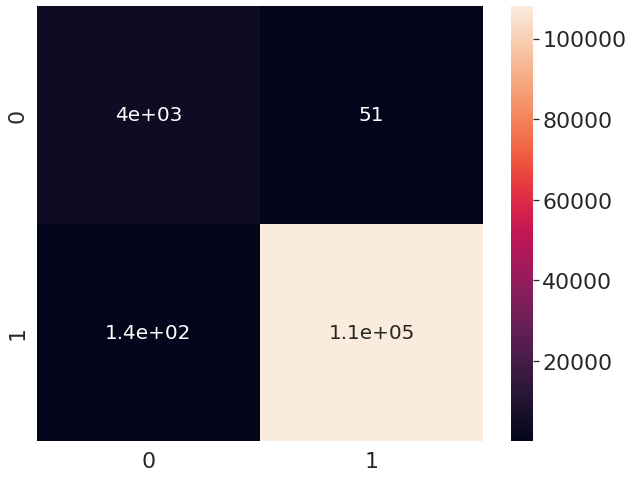

AUC score:  0.9931145672159083


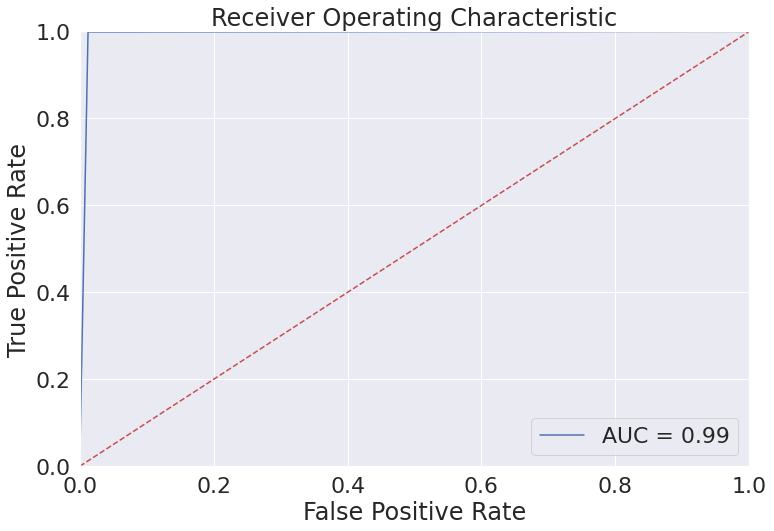

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SOFTMAX')

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.966     0.988     0.976      4100
           2      1.000     0.999     0.999    108121

    accuracy                          0.998    112221
   macro avg      0.983     0.993     0.988    112221
weighted avg      0.998     0.998     0.998    112221



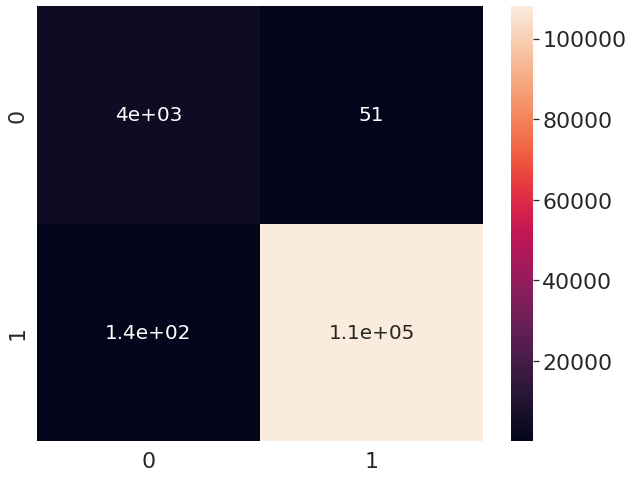

AUC score:  0.9931145672159083


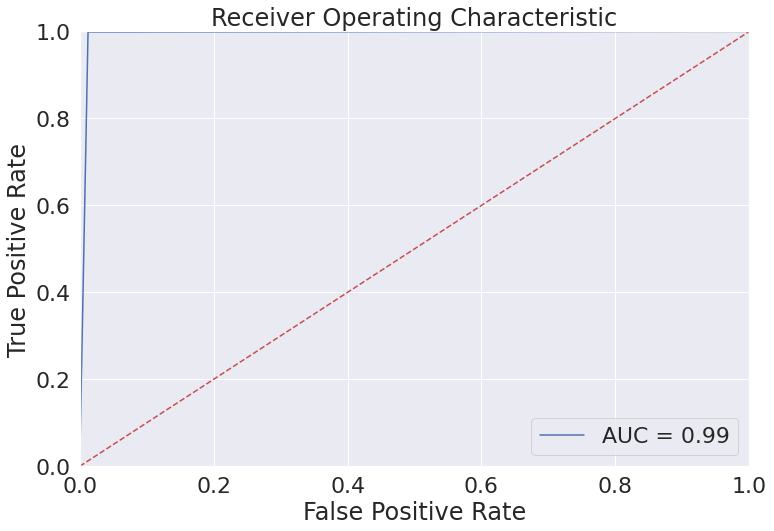

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'RF')


## 2.2.4. ANNEAL

### Train

In [77]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [78]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [79]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [80]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

In [81]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)

# 3. Train and test with other algos

In [30]:
X_train_mirai_1.shape, X_train_mirai_1.shape, X_test_gafgyt.shape, X_test_mirai.shape

((27338, 115), (27338, 115), (100791, 115), (112221, 115))

In [31]:
type(X_train_gafgyt_1), type(X_test_gafgyt)

(numpy.ndarray, numpy.ndarray)

In [32]:
y_train_gafgyt_1.shape, y_train_mirai_1.shape, y_test_gafgyt.shape, y_test_mirai.shape

((27338,), (27338,), (100791,), (112221,))

In [33]:
np.unique(y_train_gafgyt_1), np.unique(y_train_mirai_1)

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

In [34]:
from pyscripts.classifier import classify_train, classify_test

## 3.1. KNN

### Train on Gafgyt

In [35]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='KNN')

### test
#### On Gafgyt

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.950     0.999     0.974      5859
           1      1.000     0.997     0.998     94932

    accuracy                          0.997    100791
   macro avg      0.975     0.998     0.986    100791
weighted avg      0.997     0.997     0.997    100791



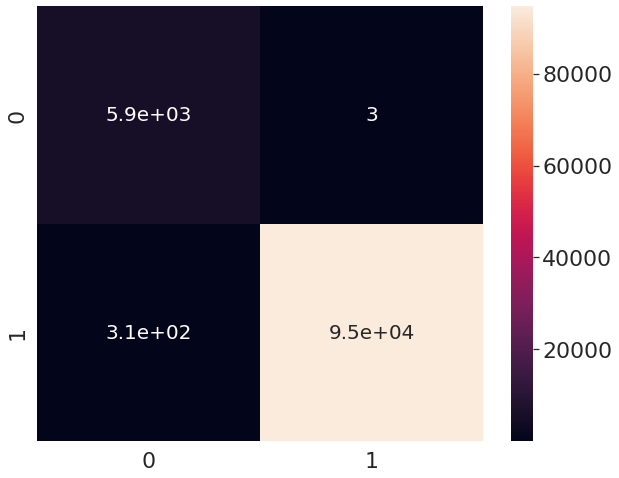

AUC score:  0.9981165028919076


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


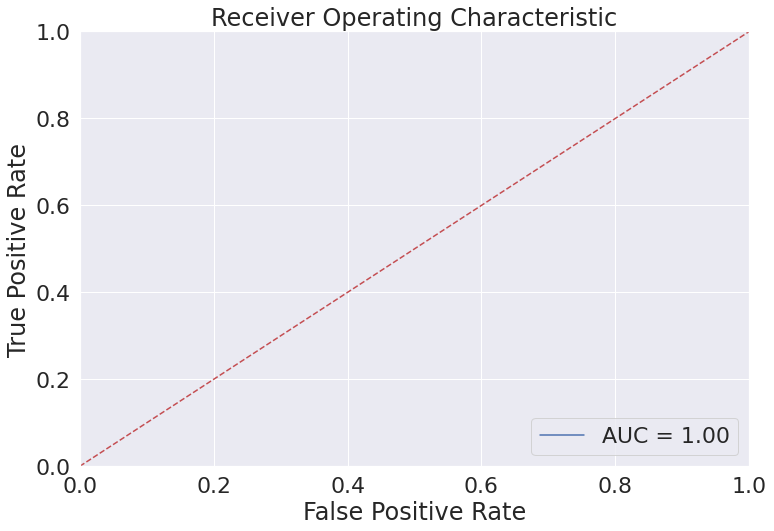

In [36]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

#### On Mirai

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.067     1.000     0.125      4100
           1      1.000     0.471     0.640    108121

    accuracy                          0.490    112221
   macro avg      0.533     0.735     0.383    112221
weighted avg      0.966     0.490     0.621    112221



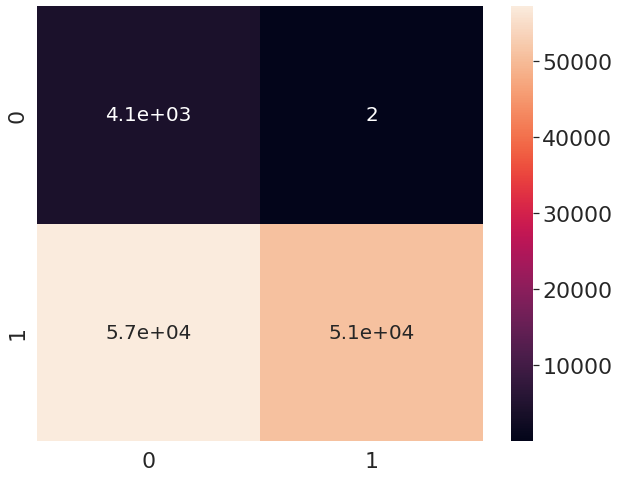

AUC score:  0.7351312790705806


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


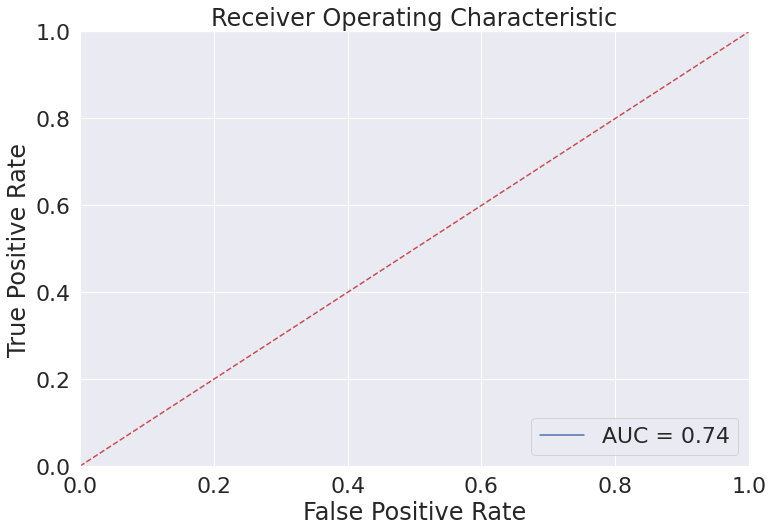

In [37]:
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [38]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='KNN')

### Testing
#### On Gafgyt

y_pred unique:  [0 1 3 4 5]
              precision    recall  f1-score   support

           0      0.078     0.989     0.144      5859
           1      0.997     0.274     0.430     94932

    accuracy                          0.315    100791
   macro avg      0.537     0.631     0.287    100791
weighted avg      0.944     0.315     0.413    100791



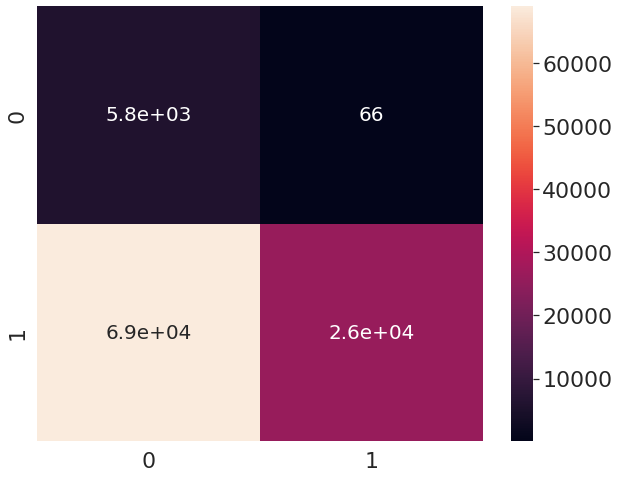

AUC score:  0.6312129603901778


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


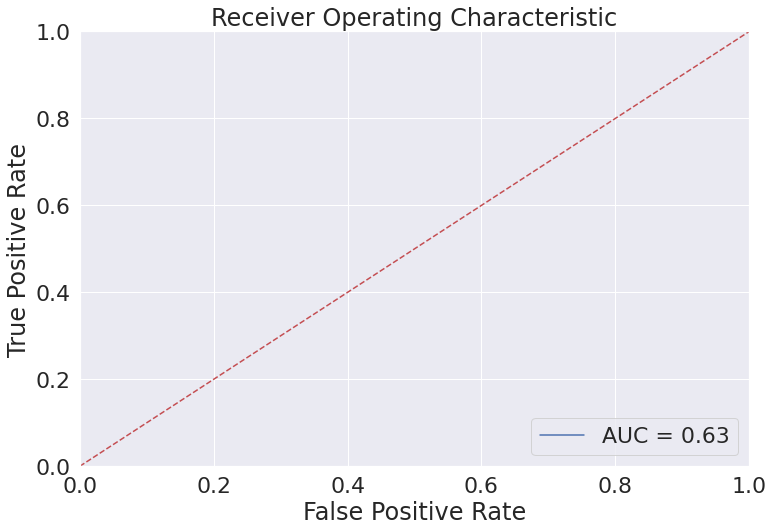

In [39]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.565     0.988     0.719      4100
           1      1.000     0.971     0.985    108121

    accuracy                          0.972    112221
   macro avg      0.782     0.980     0.852    112221
weighted avg      0.984     0.972     0.975    112221



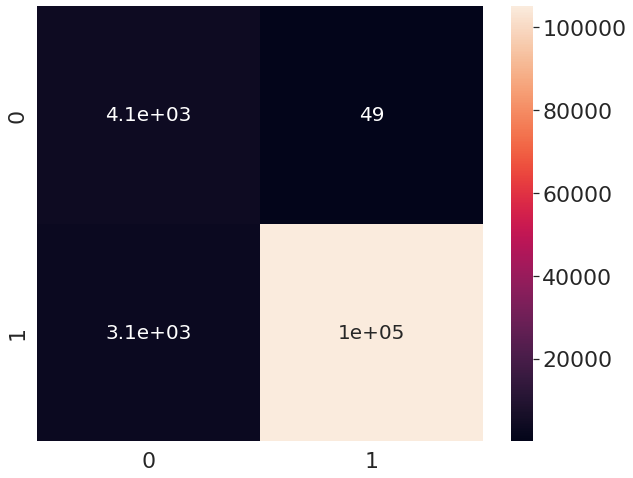

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


AUC score:  0.9795822374706206


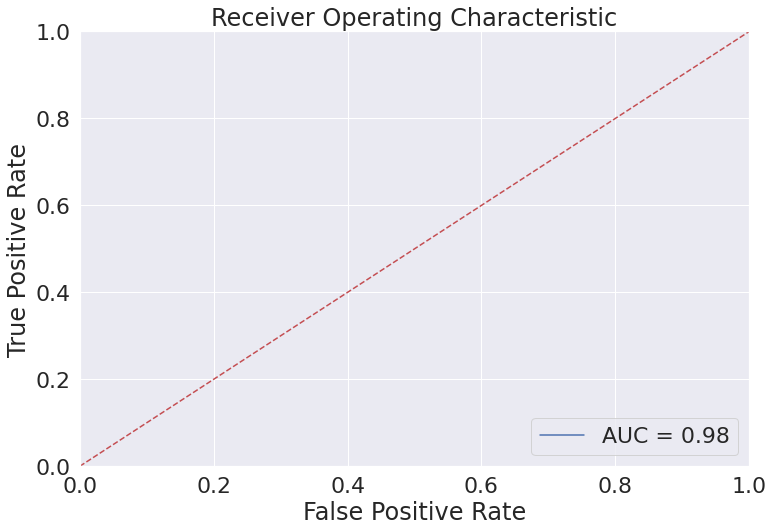

In [40]:
# on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.2. SVM
### Train on Gafgyt

In [41]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SVM')

y_pred unique:  [0 3]
              precision    recall  f1-score   support

           0      0.061     1.000     0.116      5859
           1      1.000     0.057     0.108     94932

    accuracy                          0.112    100791
   macro avg      0.531     0.528     0.112    100791
weighted avg      0.945     0.112     0.109    100791



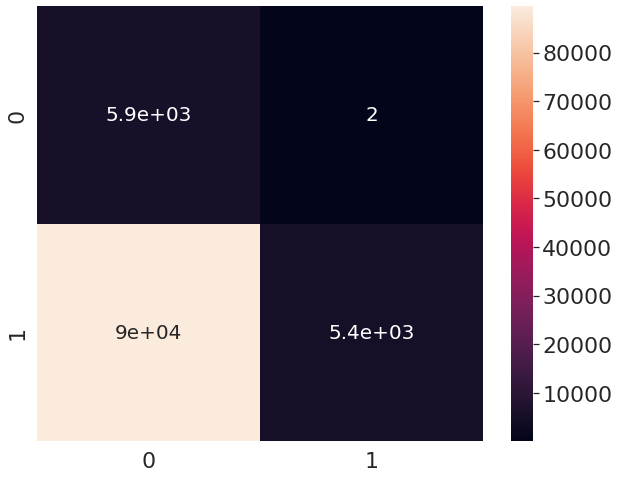

AUC score:  0.5283918724457827


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


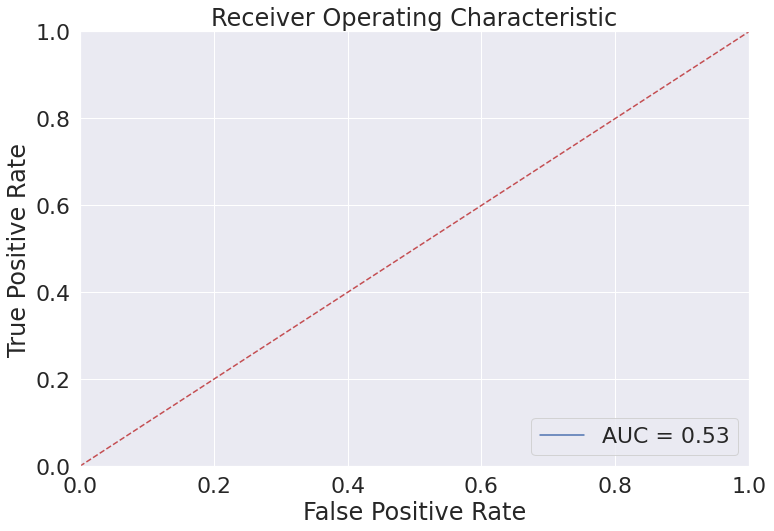

In [42]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 3]
              precision    recall  f1-score   support

           0      0.037     1.000     0.070      4100
           1      0.750     0.000     0.000    108121

    accuracy                          0.037    112221
   macro avg      0.393     0.500     0.035    112221
weighted avg      0.724     0.037     0.003    112221



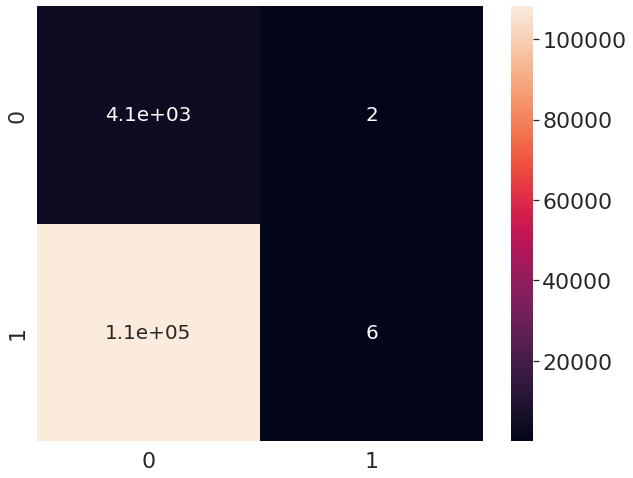

AUC score:  0.4997838442521827


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


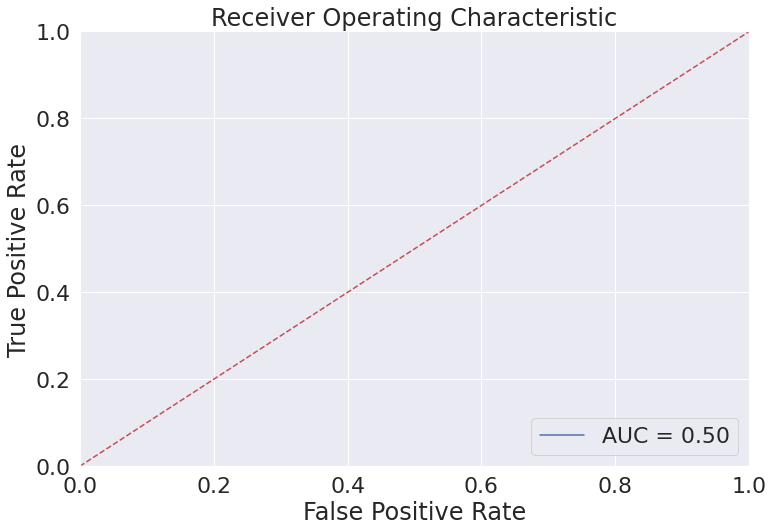

In [43]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [44]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SVM')

y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.058     1.000     0.110      5859
           1      0.000     0.000     0.000     94932

    accuracy                          0.058    100791
   macro avg      0.029     0.500     0.055    100791
weighted avg      0.003     0.058     0.006    100791



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


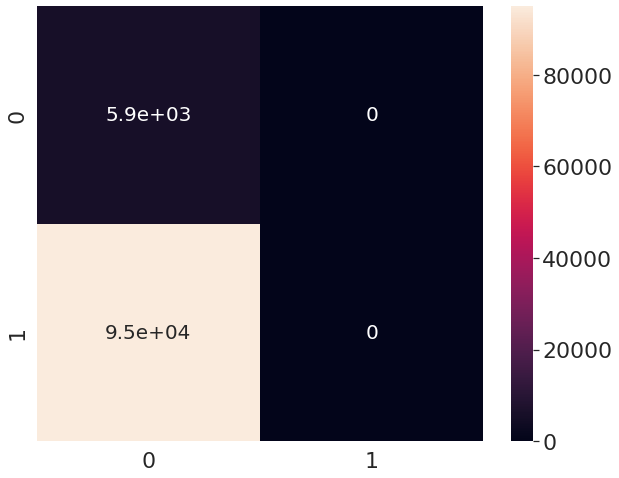

In [45]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 4 5]
              precision    recall  f1-score   support

           0      0.037     1.000     0.071      4100
           1      1.000     0.000     0.000    108121

    accuracy                          0.037    112221
   macro avg      0.518     0.500     0.035    112221
weighted avg      0.965     0.037     0.003    112221



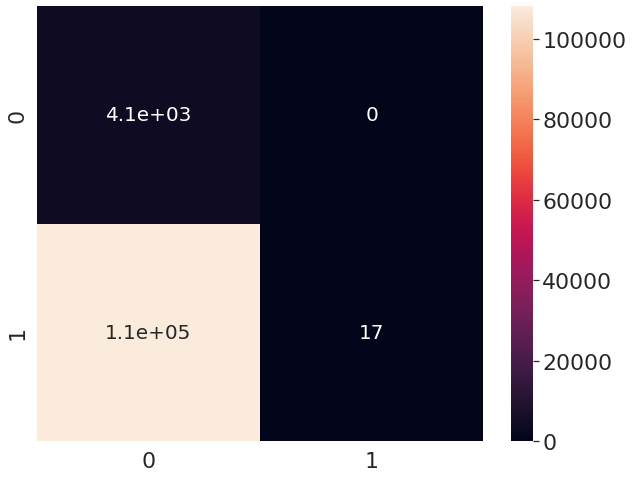

AUC score:  0.5000786156250867


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


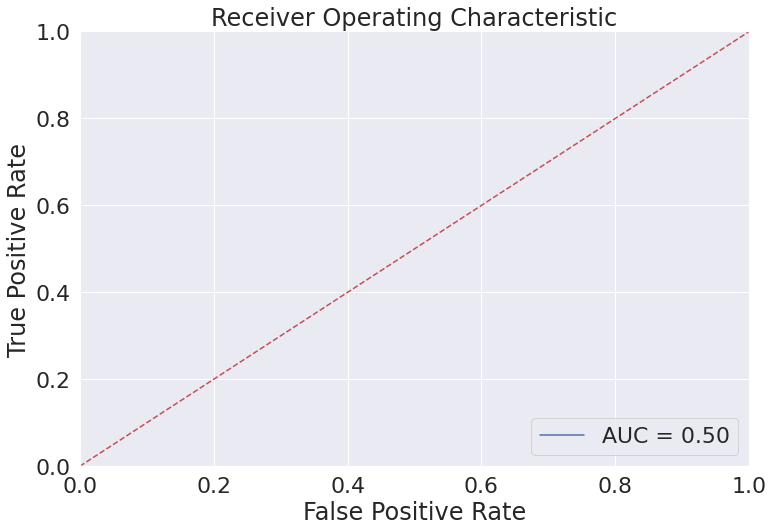

In [46]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.3. Softmax

### Train on Gafgyt

In [47]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.058     1.000     0.110      5859
           1      0.000     0.000     0.000     94932

    accuracy                          0.058    100791
   macro avg      0.029     0.500     0.055    100791
weighted avg      0.003     0.058     0.006    100791



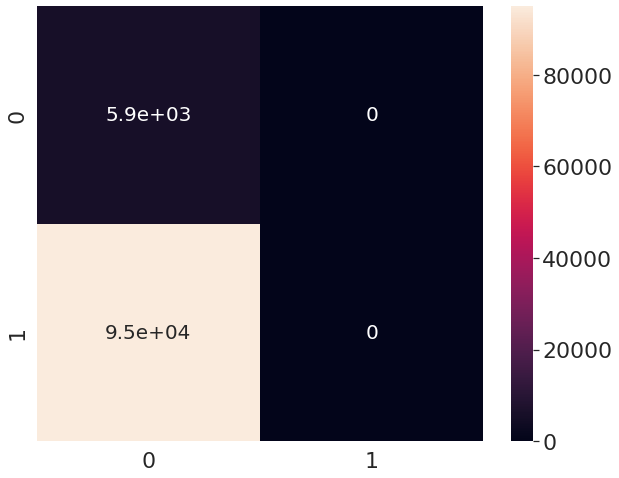

In [48]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.037     1.000     0.070      4100
           1      0.000     0.000     0.000    108121

    accuracy                          0.037    112221
   macro avg      0.018     0.500     0.035    112221
weighted avg      0.001     0.037     0.003    112221



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


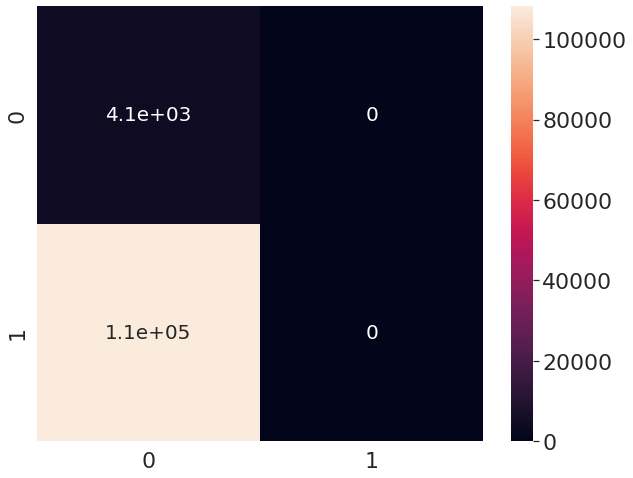

In [49]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [50]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.058     1.000     0.110      5859
           1      0.000     0.000     0.000     94932

    accuracy                          0.058    100791
   macro avg      0.029     0.500     0.055    100791
weighted avg      0.003     0.058     0.006    100791



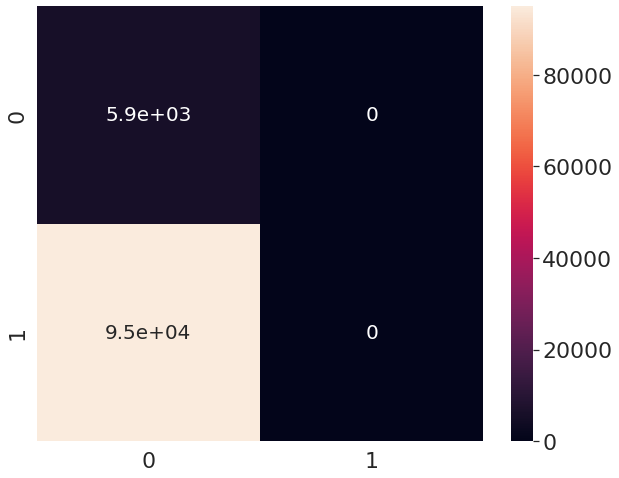

In [51]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.037     1.000     0.070      4100
           1      0.000     0.000     0.000    108121

    accuracy                          0.037    112221
   macro avg      0.018     0.500     0.035    112221
weighted avg      0.001     0.037     0.003    112221



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


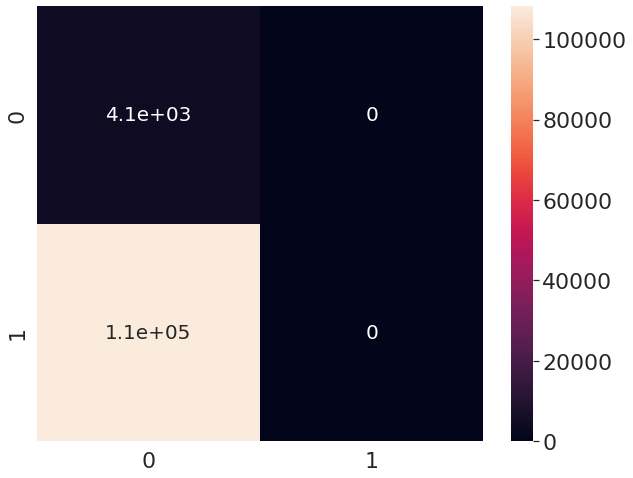

In [52]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.4. Random Forest

### Train on Gafgyt

In [53]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='RF')

y_pred unique:  [0 1 3 4 5]
              precision    recall  f1-score   support

           0      0.992     0.998     0.995      5859
           1      1.000     1.000     1.000     94932

    accuracy                          0.999    100791
   macro avg      0.996     0.999     0.997    100791
weighted avg      0.999     0.999     0.999    100791



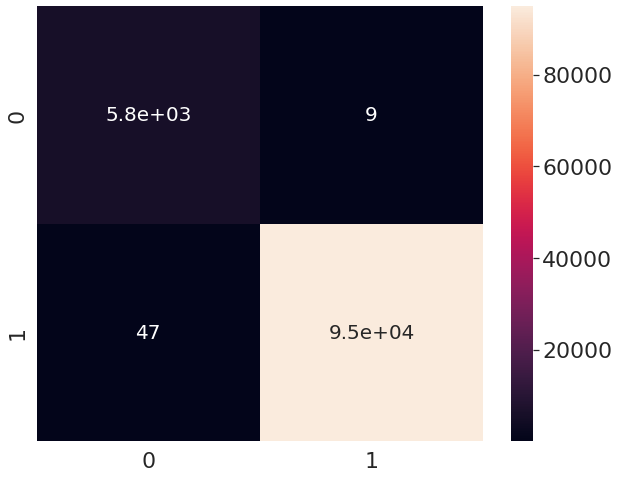

AUC score:  9.989844052332583e-01


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


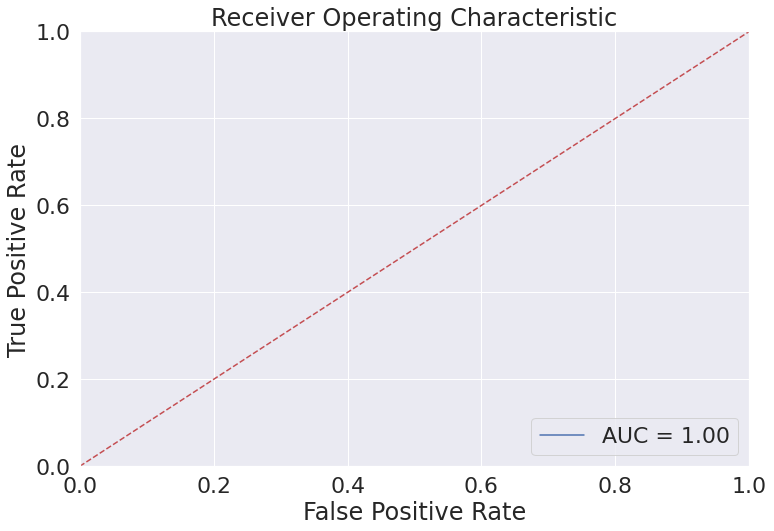

In [54]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 4 5]
              precision    recall  f1-score   support

           0      0.053     0.999     0.101      4100
           1      1.000     0.324     0.489    108121

    accuracy                          0.348    112221
   macro avg      0.526     0.661     0.295    112221
weighted avg      0.965     0.348     0.475    112221



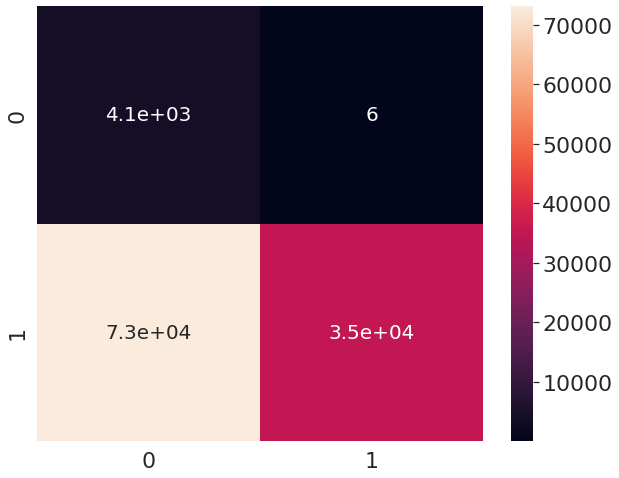

AUC score:  0.6610962446996489


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


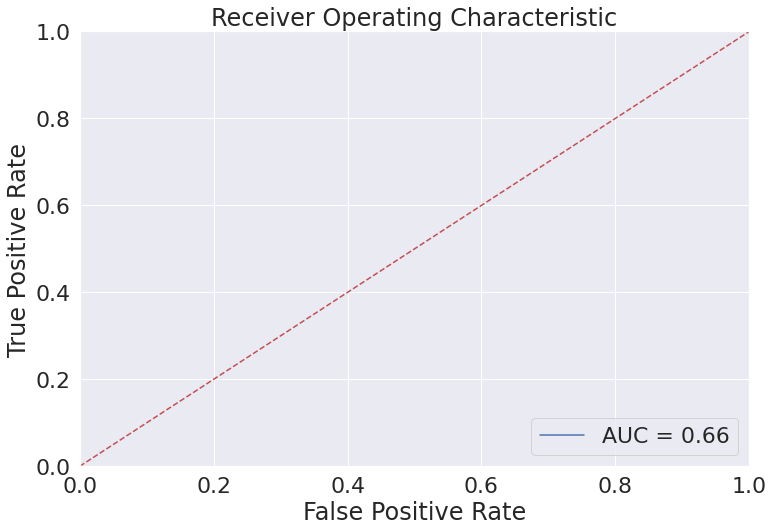

In [55]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [56]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='RF')

y_pred unique:  [0 3]
              precision    recall  f1-score   support

           0      0.088     1.000     0.162      5859
           1      1.000     0.360     0.529     94932

    accuracy                          0.397    100791
   macro avg      0.544     0.680     0.345    100791
weighted avg      0.947     0.397     0.508    100791



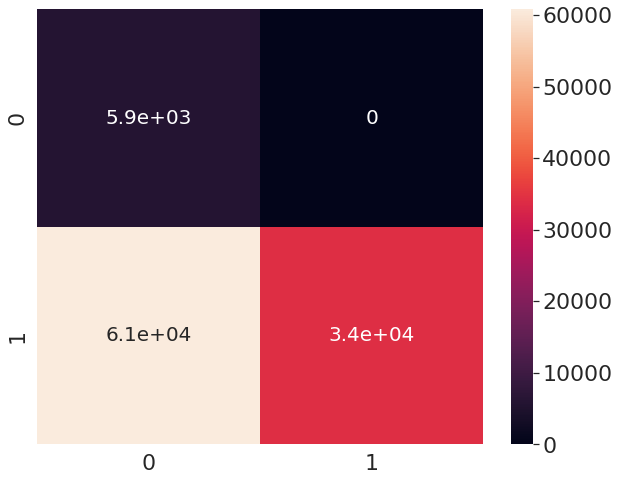

AUC score:  0.6799077234230818


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


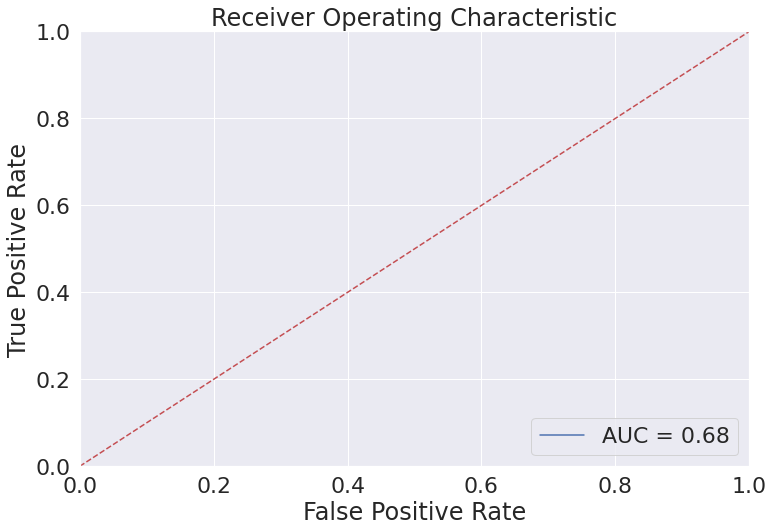

In [57]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.995     1.000     0.997      4100
           1      1.000     1.000     1.000    108121

    accuracy                          1.000    112221
   macro avg      0.997     1.000     0.999    112221
weighted avg      1.000     1.000     1.000    112221



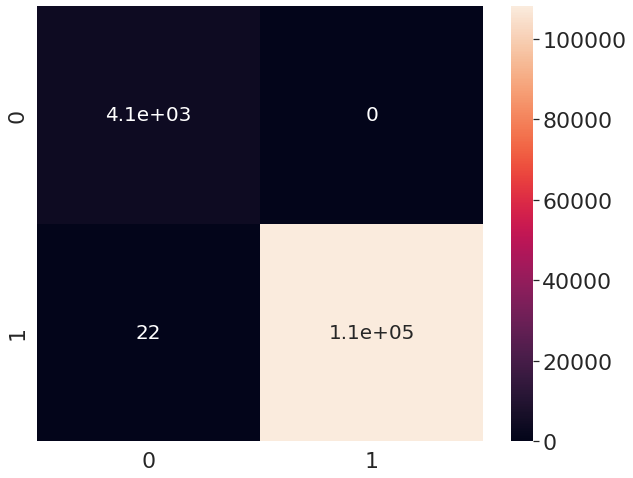

AUC score:  0.9998982621322408


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


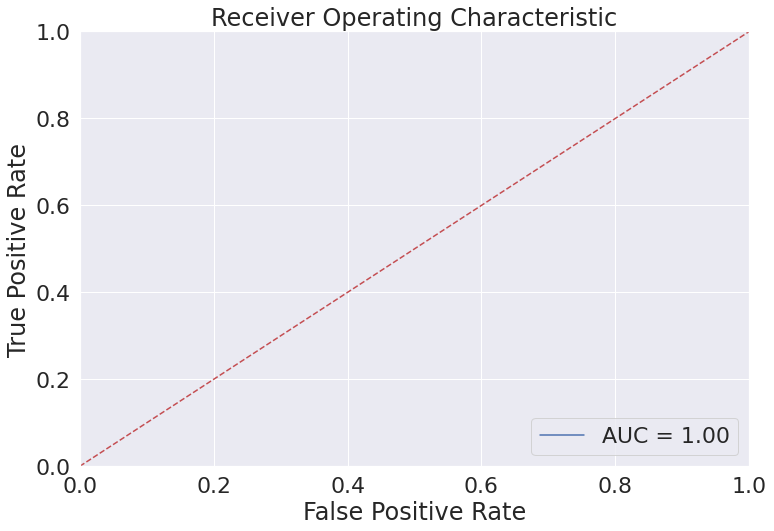

In [58]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.5. Decision Tree

### Train on Gafgyt

In [59]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='DT')

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.995     1.000     0.998      5859
           1      1.000     1.000     1.000     94932

    accuracy                          1.000    100791
   macro avg      0.998     1.000     0.999    100791
weighted avg      1.000     1.000     1.000    100791



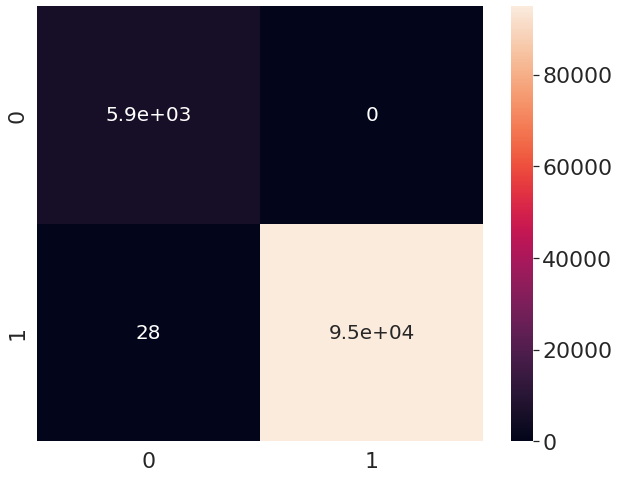

AUC score:  0.9998525260186238


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


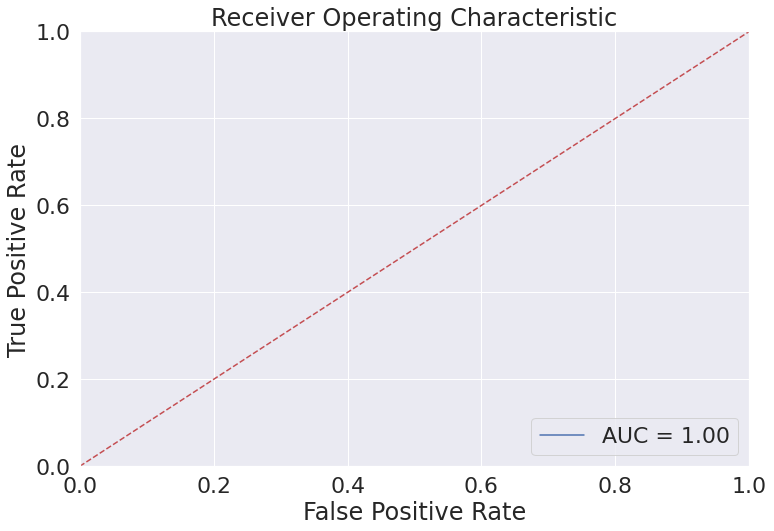

In [60]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4]
              precision    recall  f1-score   support

           0      0.053     1.000     0.101      4100
           1      1.000     0.324     0.489    108121

    accuracy                          0.348    112221
   macro avg      0.527     0.662     0.295    112221
weighted avg      0.965     0.348     0.475    112221



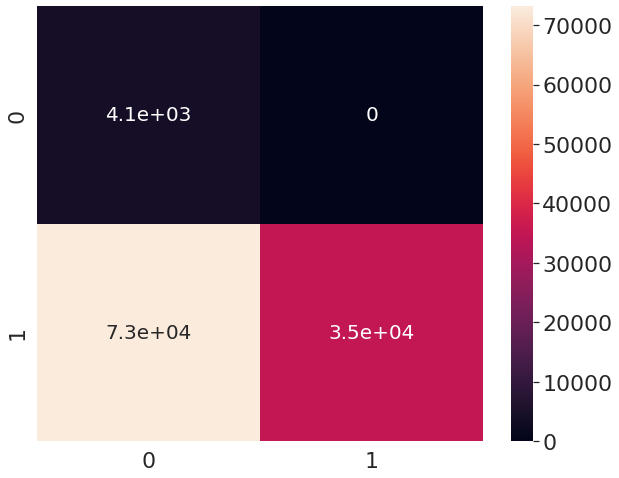

AUC score:  0.661809454222584


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


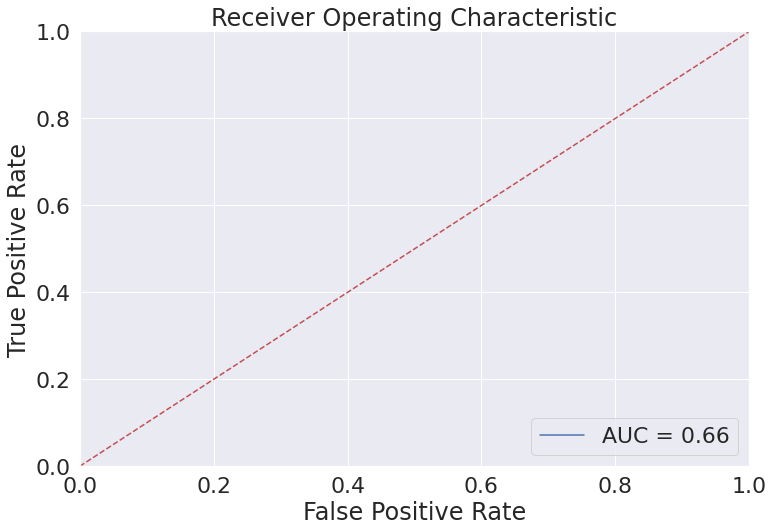

In [61]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [62]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='DT')

y_pred unique:  [0 2 3 5]
              precision    recall  f1-score   support

           0      0.088     1.000     0.162      5859
           1      1.000     0.361     0.531     94932

    accuracy                          0.398    100791
   macro avg      0.544     0.681     0.346    100791
weighted avg      0.947     0.398     0.509    100791



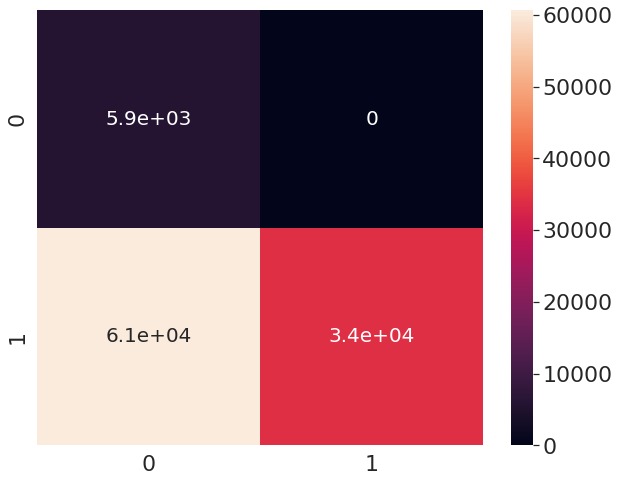

AUC score:  0.6806398264020562


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


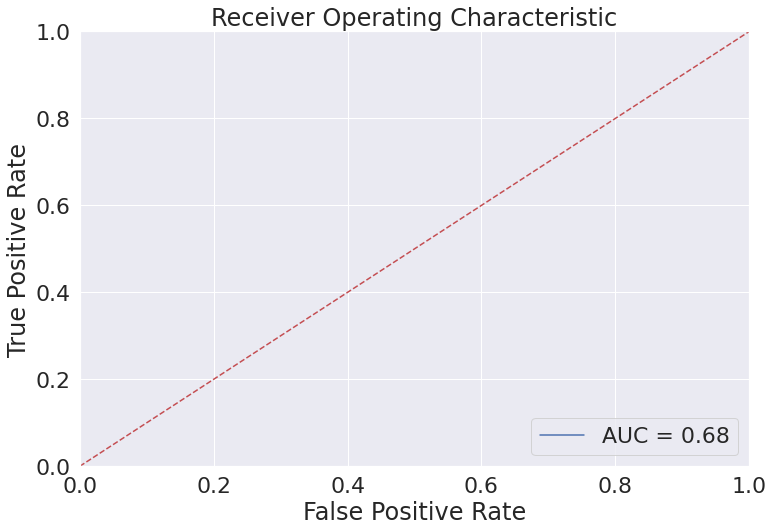

In [63]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.999     1.000     0.999      4100
           1      1.000     1.000     1.000    108121

    accuracy                          1.000    112221
   macro avg      0.999     1.000     1.000    112221
weighted avg      1.000     1.000     1.000    112221



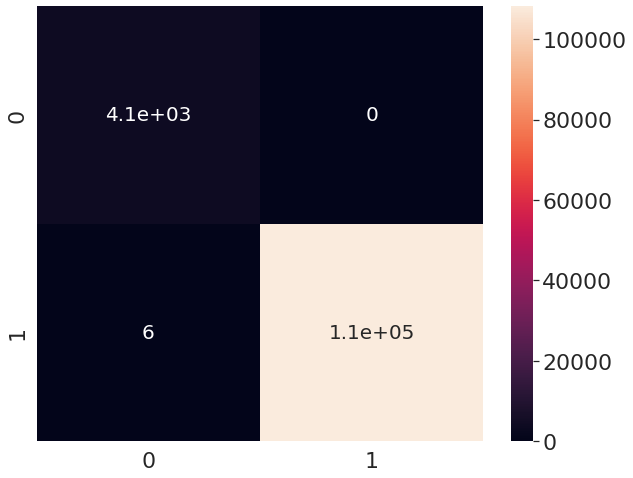

AUC score:  0.9999722533087929


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


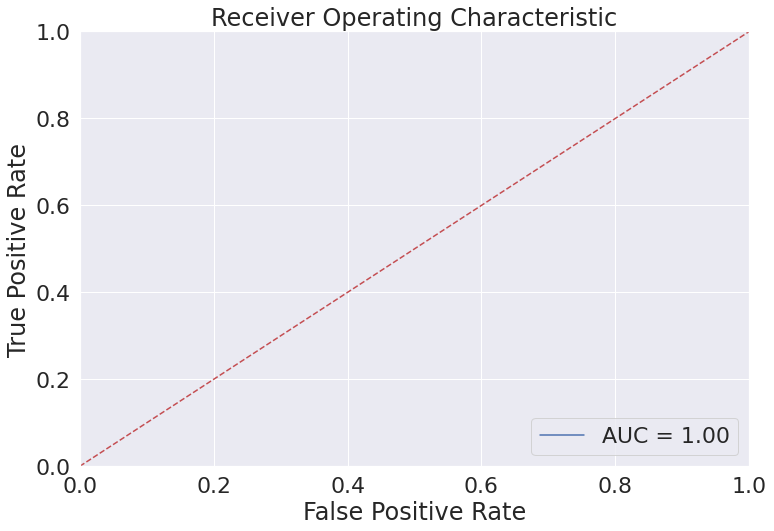

In [64]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.6. XGB

### Train on Gafgyt

In [65]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='XGB')

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.997     1.000     0.998      5859
           1      1.000     1.000     1.000     94932

    accuracy                          1.000    100791
   macro avg      0.998     1.000     0.999    100791
weighted avg      1.000     1.000     1.000    100791



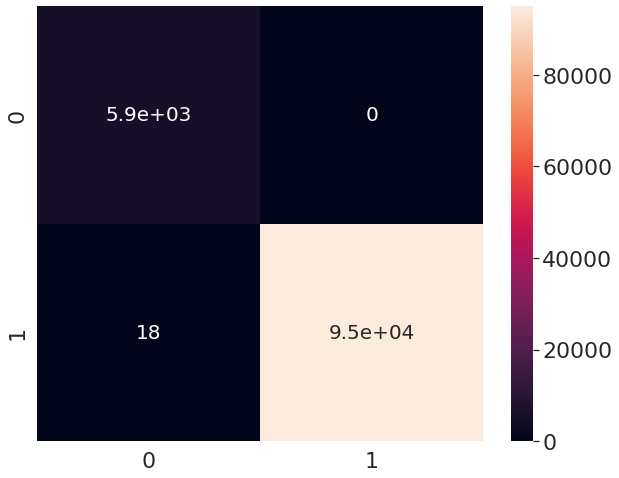

AUC score:  0.9999051952976867


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


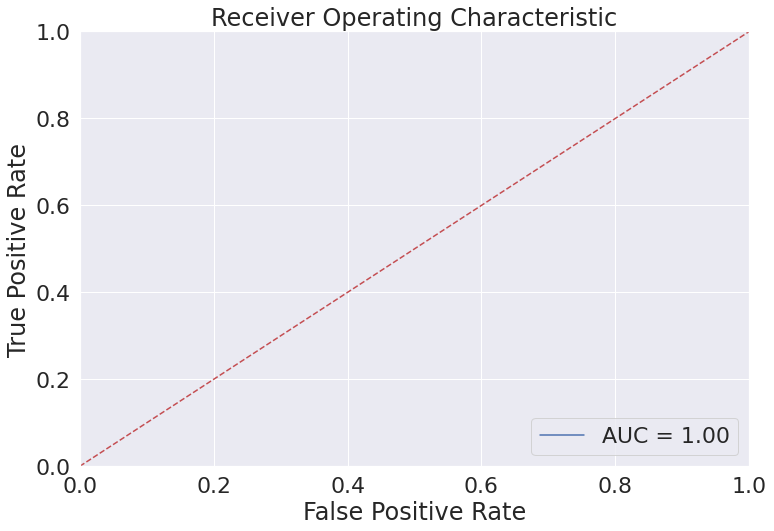

In [66]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.113     1.000     0.203      4100
           1      1.000     0.703     0.825    108121

    accuracy                          0.714    112221
   macro avg      0.557     0.851     0.514    112221
weighted avg      0.968     0.714     0.803    112221



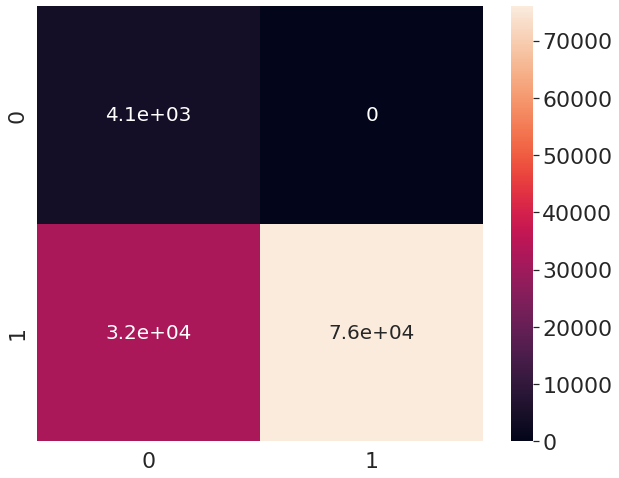

AUC score:  0.8513193551668963


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


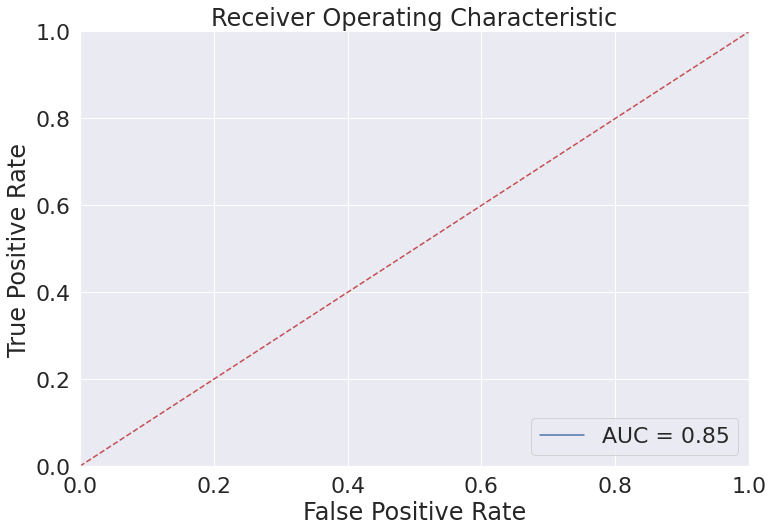

In [67]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [68]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='XGB')

y_pred unique:  [0 1 3 5]
              precision    recall  f1-score   support

           0      0.073     1.000     0.137      5859
           1      1.000     0.221     0.361     94932

    accuracy                          0.266    100791
   macro avg      0.537     0.610     0.249    100791
weighted avg      0.946     0.266     0.348    100791



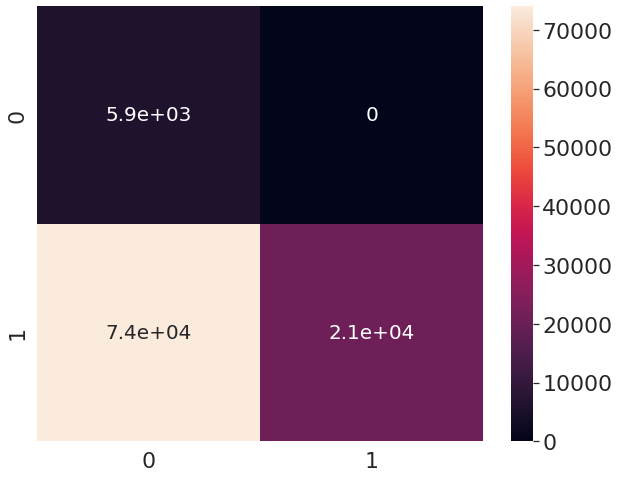

AUC score:  0.610294737285636


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


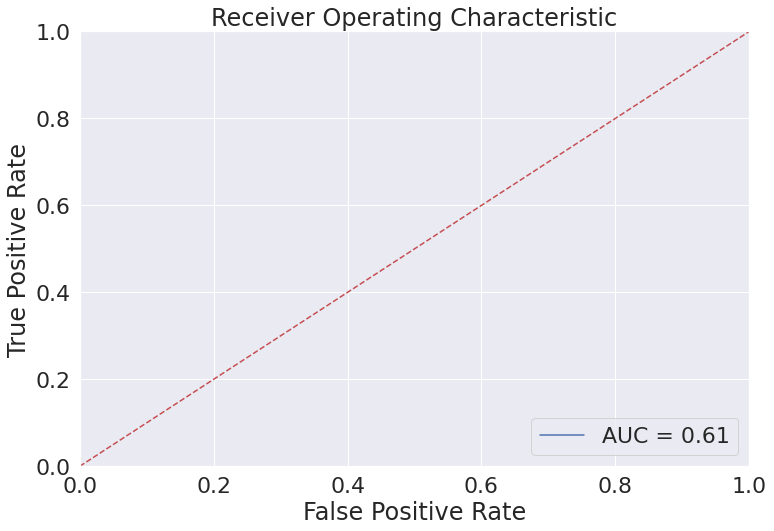

In [69]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.997     1.000     0.999      4100
           1      1.000     1.000     1.000    108121

    accuracy                          1.000    112221
   macro avg      0.999     1.000     0.999    112221
weighted avg      1.000     1.000     1.000    112221



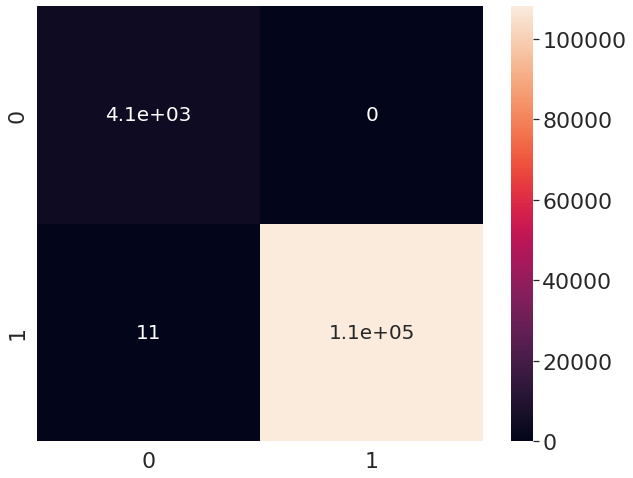

AUC score:  0.9999491310661204


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


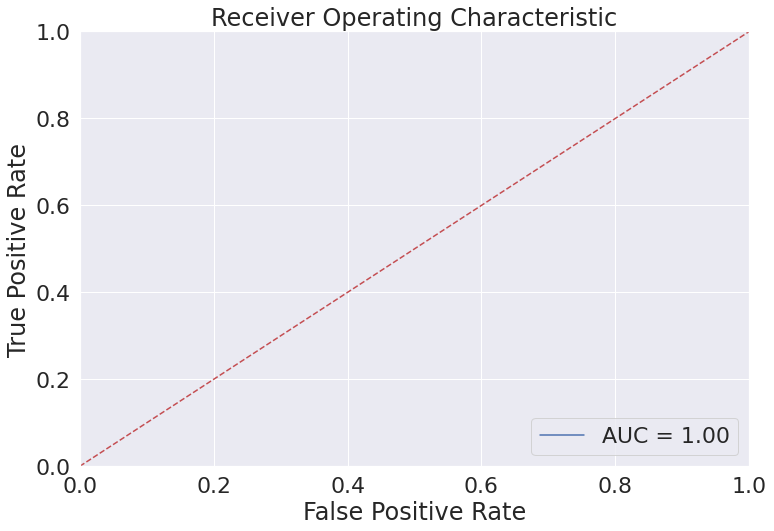

In [70]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)